##### **Contribution**    - **Data Dwellers**
**. Dhia Eddine Hizaoui**

**.Mohamed Amine Ayedi**

**.Khalil Ayache**

**.Yousra chaieb**

**.Molka Chkir**

**.Roua Zekri**

# **Problem Statement**

**Predicting customer churn is a critical aspect for any business, as it helps identify customers who are likely to discontinue using their services.**

**In the telecommunications sector, customers have the freedom to choose from various service providers and frequently switch between them. This highly competitive landscape leads to an annual churn rate ranging from 15-25%. Given that acquiring new customers is 5-10 times more costly than retaining existing ones, focusing on customer retention has become a priority over customer acquisition.**

**For many established telecom operators, retaining their most profitable customers is the top business objective. To minimize churn, telecom companies need to predict which customers are at the greatest risk of leaving. In this project, you will analyze customer data from a leading telecom company, conduct exploratory data analysis, and identify the key factors contributing to customer attrition.**



#**Phase 1 :buisness understanding:**

#**Objective:**
**I. Understand the importance of churn prediction and the business implications.**

**II. Summarize the problem statement and the goals of each paper.**

**III. Identify how churn prediction can drive retention strategies.**

#**phase 2 :data understanding**

In [21]:
import numpy as np
import joblib
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             roc_curve, precision_recall_curve, classification_report)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [22]:
# Loading data
churn_80 = pd.read_csv('churn-bigml-80.csv')
churn_20 = pd.read_csv('churn-bigml-20.csv')
# Combine training and test data to tune the traitement
combined_data = pd.concat([churn_80, churn_20], axis=0)

In [23]:
# Overview of the first lines to understand the data structure
combined_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Categorical (Qualitative) Variables**
**State** : The state to which the customer belongs (e.g., KS, OH, NJ)

**International plan**: Indicates whether the customer has an international calling plan (Yes/No).

**Voice mail plan** : Indicates whether the customer has a voicemail plan (Yes/No).

**Churn** :Target variable indicating whether the customer left the service (0 = No, 1 = Yes)
**Continuous (Quantitative) Numerical Variables**

**Account length** :Duration of the customer's account (in days).

**Number vmail messages** : Number of voicemail messages.

**Total day minutes** :Total minutes of calls made during the day.

**Total day calls** : Total number of calls made during the day.

**Total day charge** :Total cost of calls made during the day.

**Total eve minutes** :Total cost of calls made during the day.

**Total eve calls** : Total number of calls made in the evening.

**Total eve charge** : Total cost of calls made in the evening

**Total night minutes** :Total minutes of calls made at night.

**Total night calls** :Total number of calls made at night.

**Total night charge** :Total cost of calls made at night.

**Total intl minutes** : Total minutes of international calls.

**Total intl calls** : Total number of international calls.

**Total intl charge** :Total cost of international calls.

**Customer service calls** : Number of times the customer contacted customer service.

In [24]:
# Dataset Info
variable_types = combined_data.dtypes
print("\nTypes des variables :")
print(variable_types)


Types des variables :
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [25]:
# Dataset Duplicate Value Count
len(combined_data[combined_data.duplicated()])

0

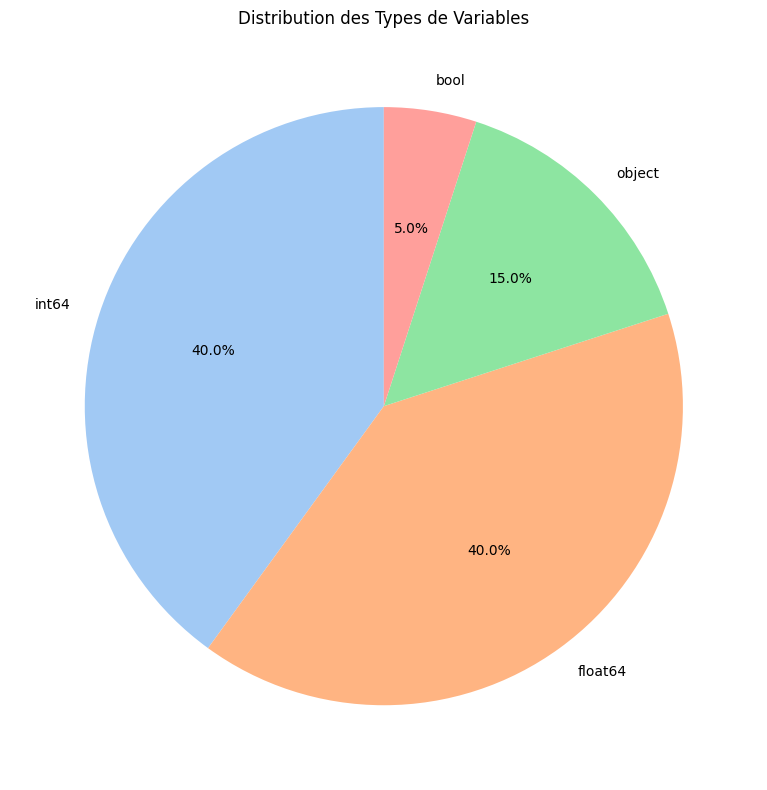

In [26]:
# Graph of variable types
plt.figure(figsize=(8, 8))
variable_types.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution des Types de Variables')
plt.ylabel('')
plt.tight_layout()
plt.show()

# **Distribution of Variable Types**

---

### **Overview**

The pie chart illustrates the distribution of data types in the dataset. Below is a detailed breakdown:

---

### **1. Integer Variables (int64)**

- **Proportion**: **40.0%** of the variables.
- **Characteristics**: Represent count-based or categorical features.
- **Examples**:
  - **Total day calls**: Number of calls made during the day.
  - **Account length**: Duration of customer subscription.

---

### **2. Floating-Point Variables (float64)**

- **Proportion**: **40.0%** of the variables.
- **Characteristics**: Represent continuous numerical data.
- **Examples**:
  - **Total day minutes**: Total duration of calls during the day.
  - **Total day charge**: Corresponding charges for day-time calls.

---

### **3. Categorical Variables (object)**

- **Proportion**: **15.0%** of the variables.
- **Characteristics**: Text-based features representing categories.
- **Examples**:
  - **State**: The region where the customer resides.
  - **International plan**: Whether the customer has subscribed to this plan.

---

### **4. Boolean Variables (bool)**

- **Proportion**: **5.0%** of the variables.
- **Characteristics**: Binary features indicating True/False conditions.
- **Examples**:
  - **Churn**: Whether the customer churned (True) or not (False).

---

### **Key Insights**

- The dataset has a **balanced mix of integer and float variables** (each at 40%), providing both categorical and continuous data for modeling.
- **Categorical and boolean variables** make up a smaller proportion but are essential for identifying patterns related to customer behavior and churn.
- Proper preprocessing, including encoding categorical variables and scaling numerical features, will be necessary to prepare the data for machine learning.



In [27]:
# Missing Values/Null Values
missing_values = combined_data.isnull().sum()
print("\nValeurs manquantes par variable :")
print(missing_values)


Valeurs manquantes par variable :
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


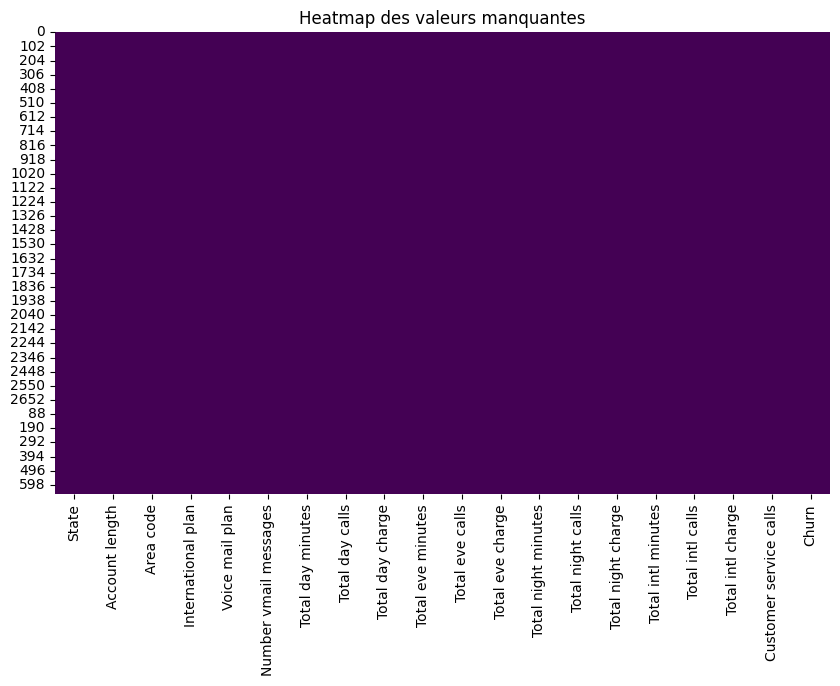

In [28]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()

**No Missing Values:**
The execution of the code and heatmap shows that all columns in your dataset have 0 missing values.

This confirms that the dataset is complete for every variable, including:
State, Account length, Area code, Total day minutes, Customer service calls, Churn, etc.

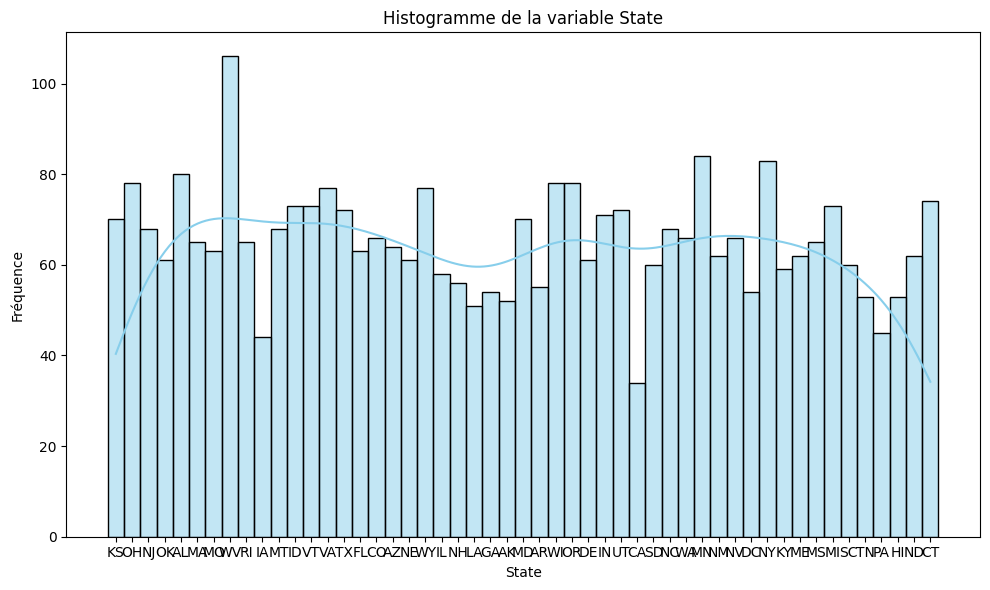

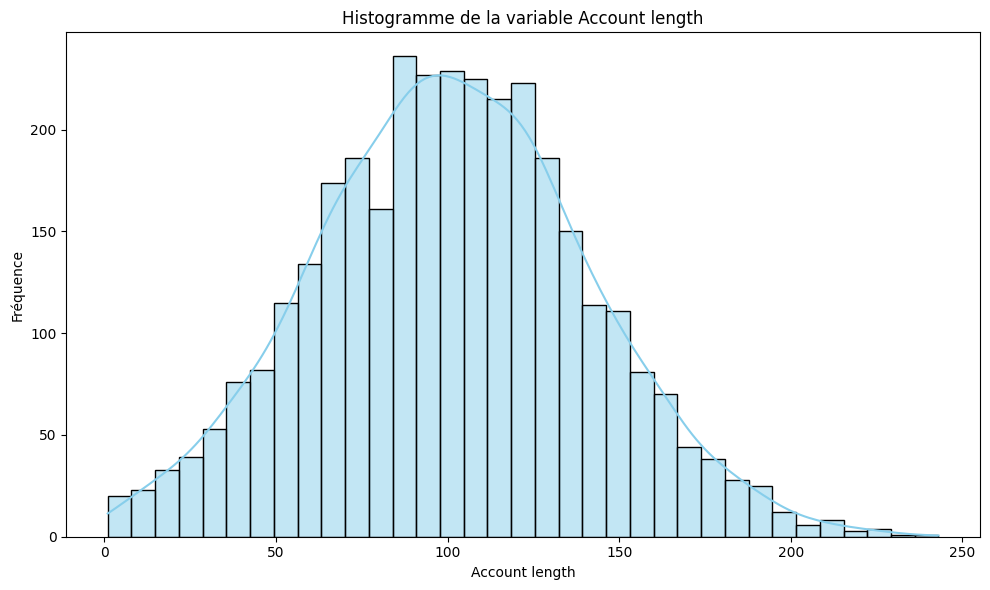

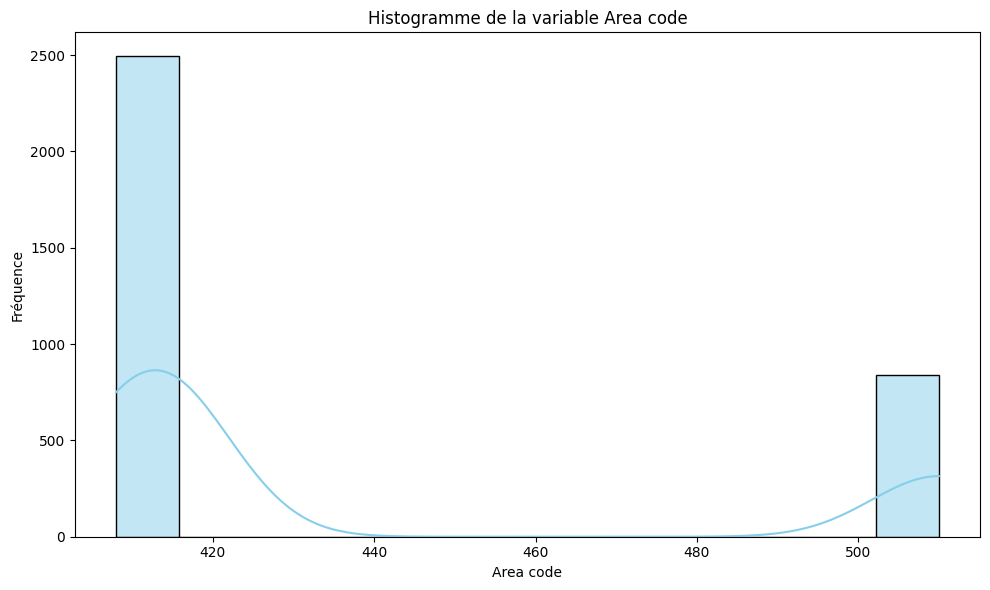

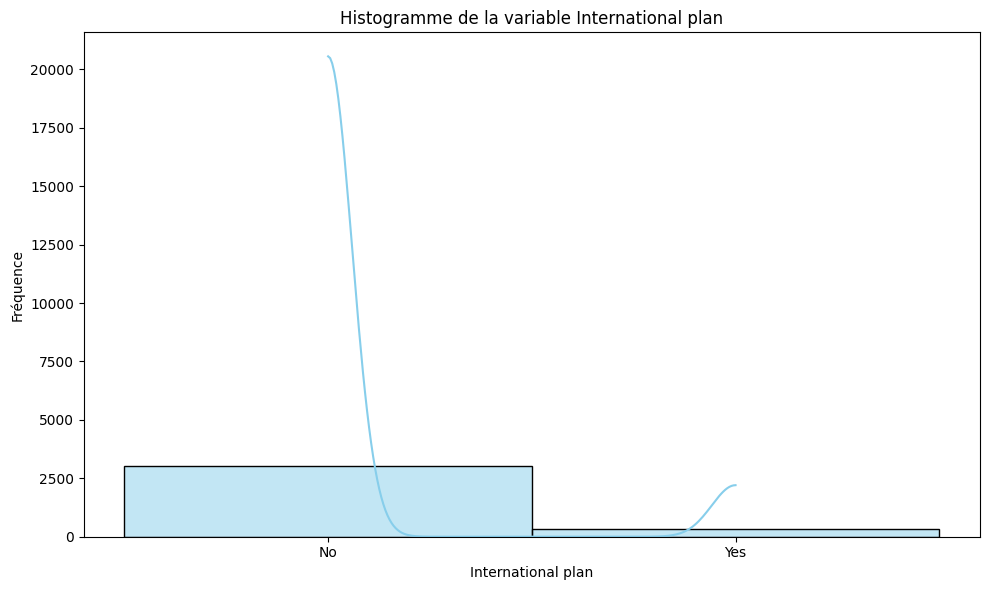

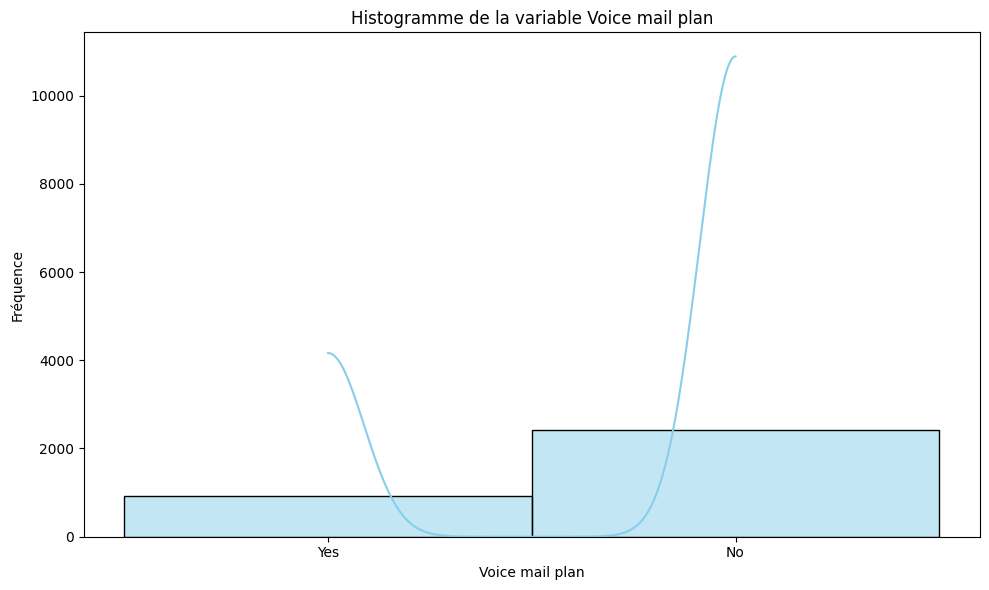

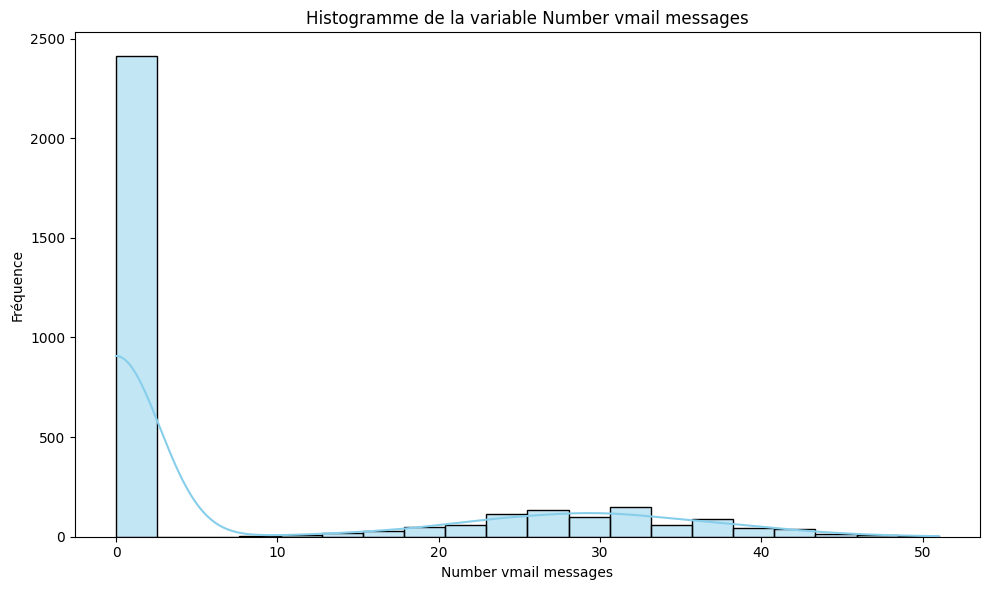

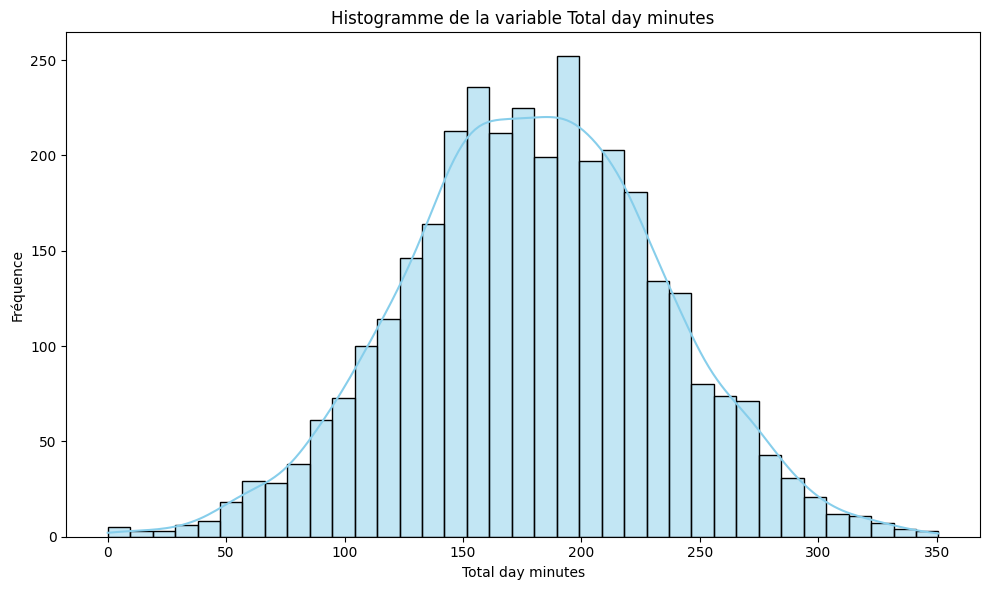

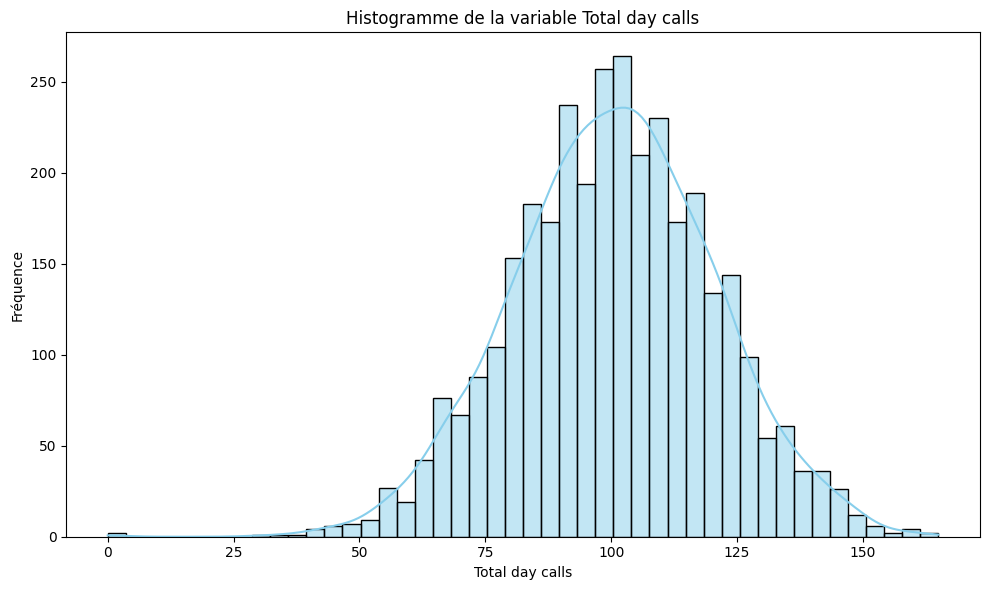

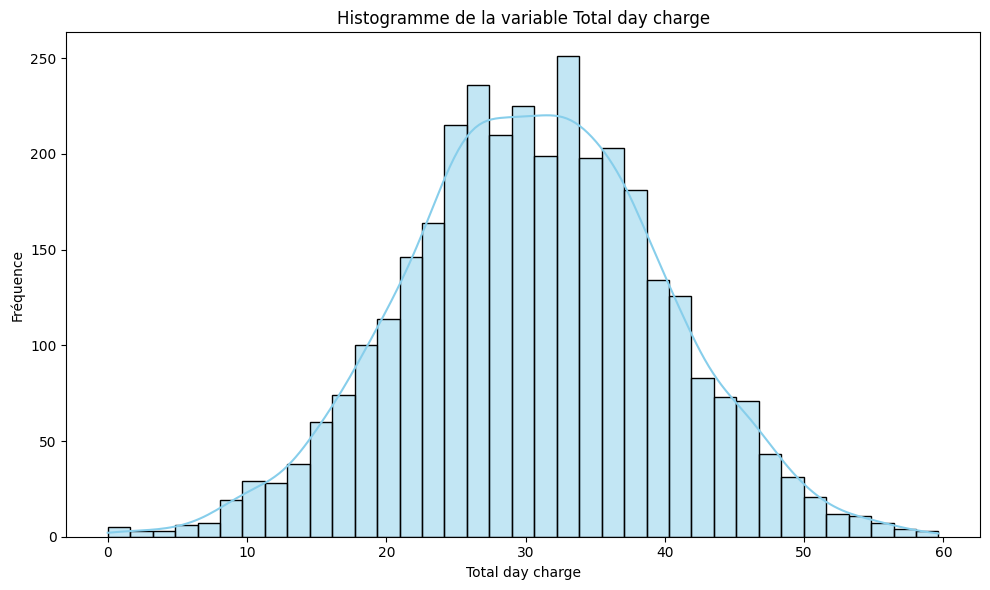

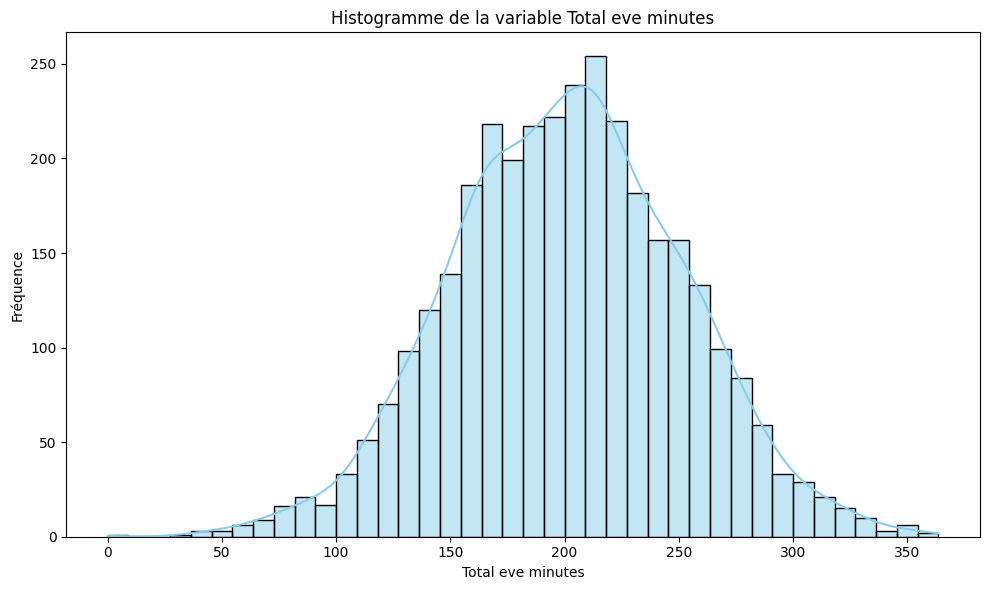

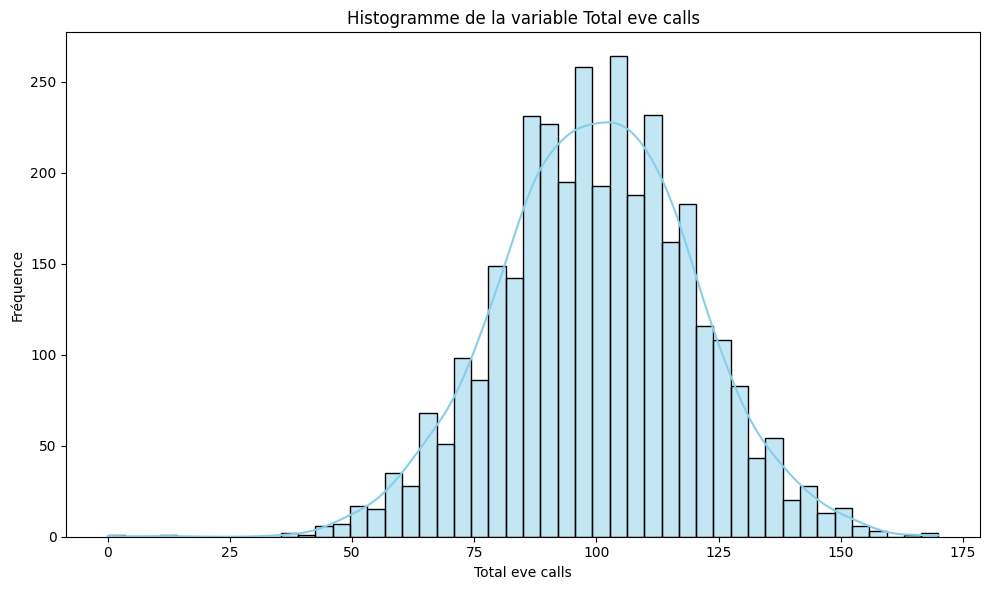

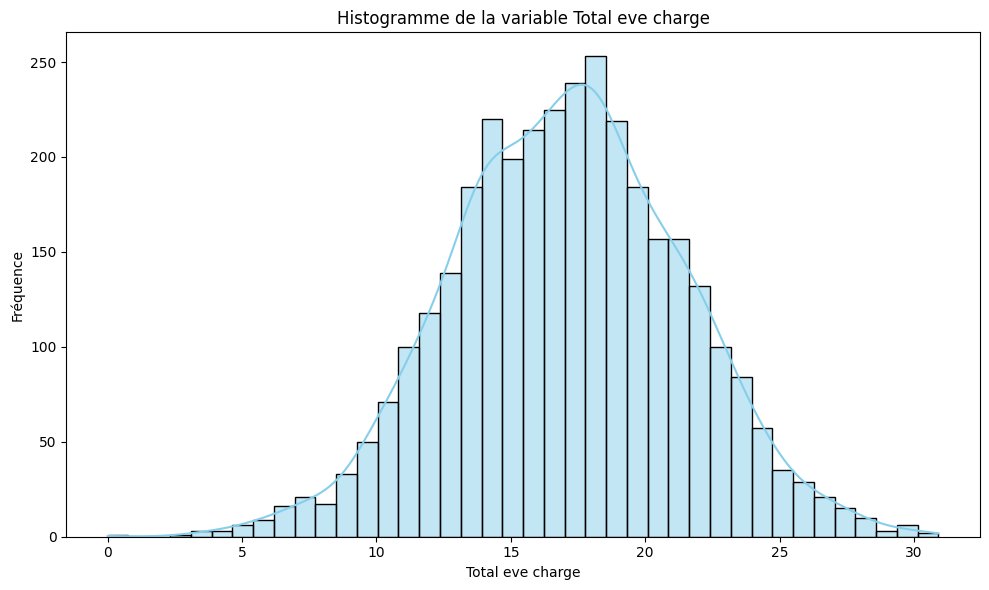

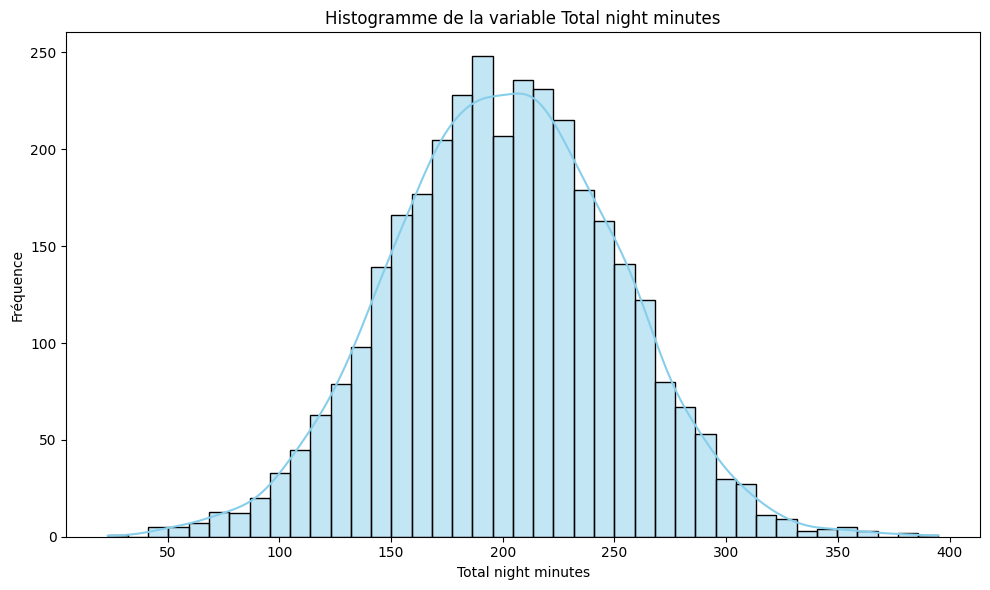

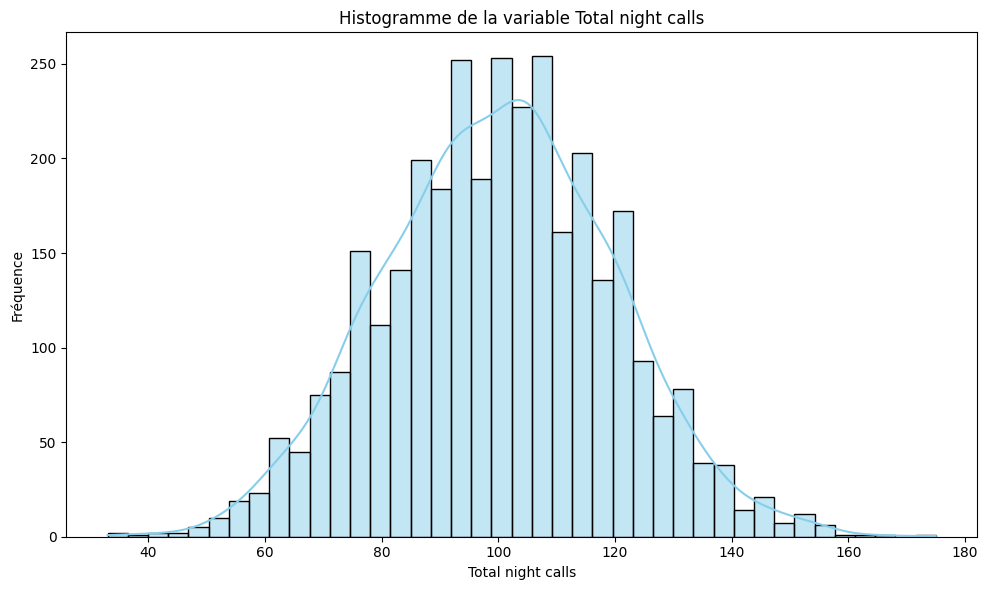

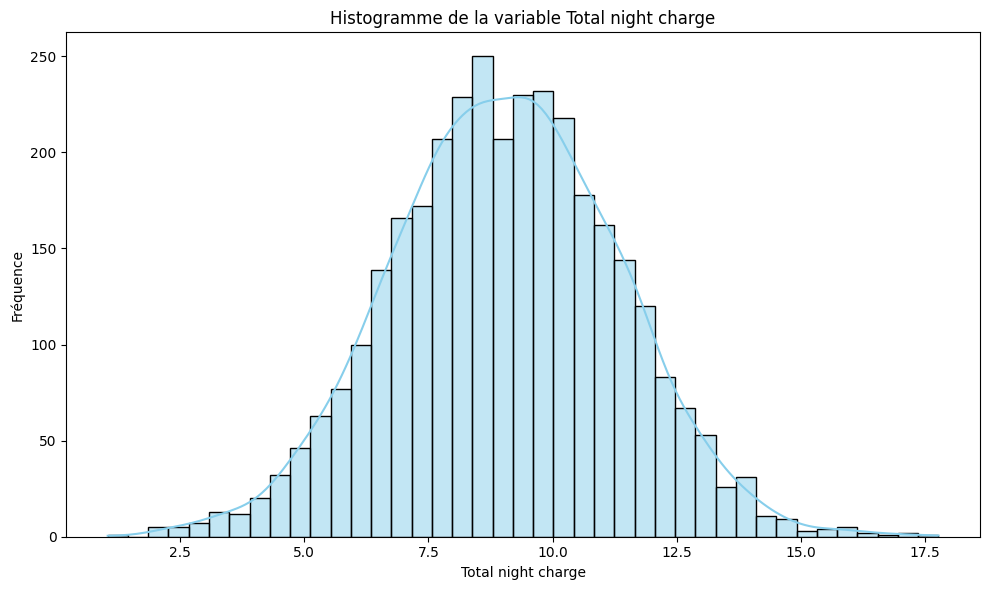

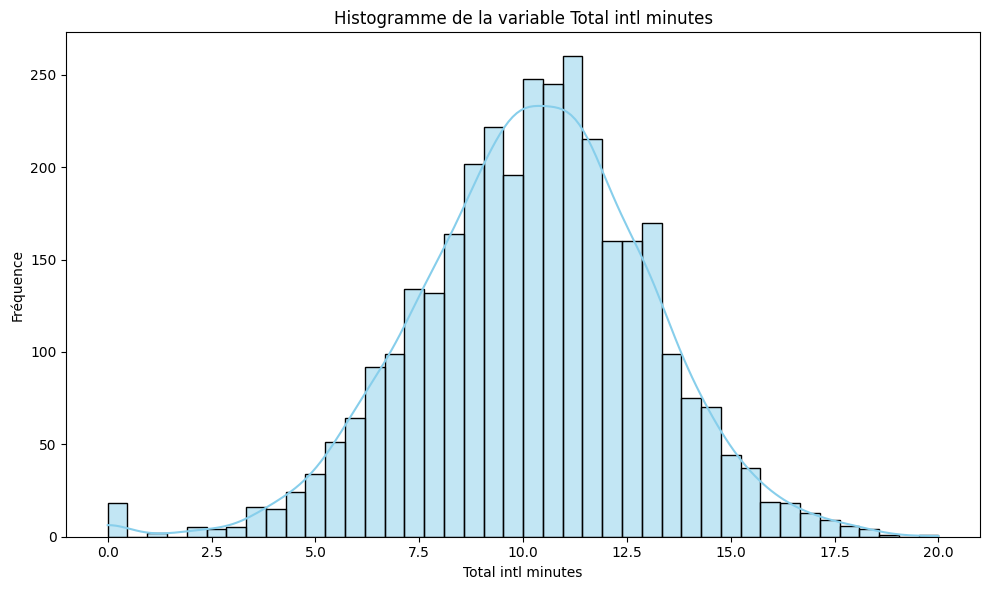

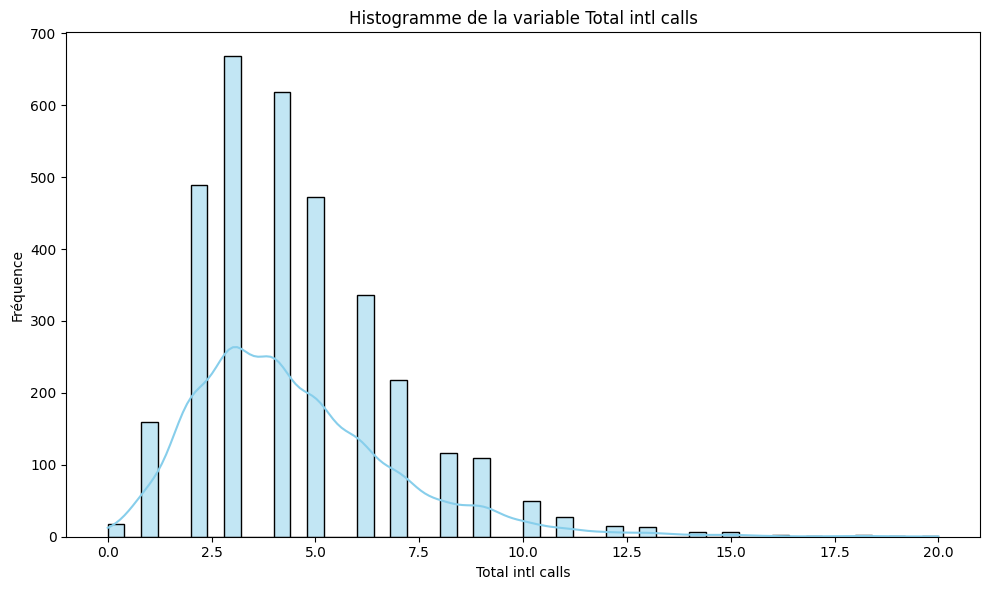

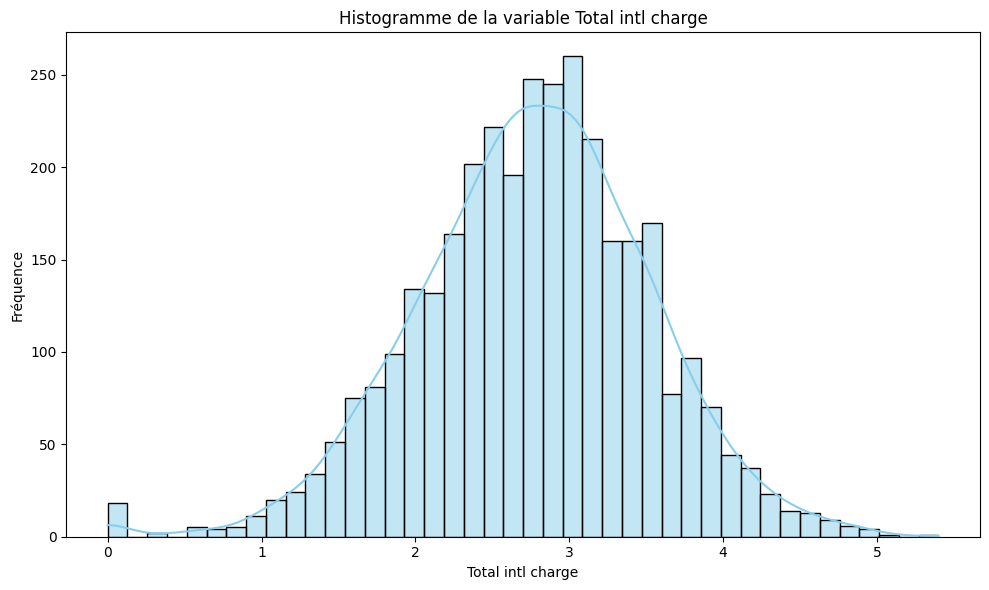

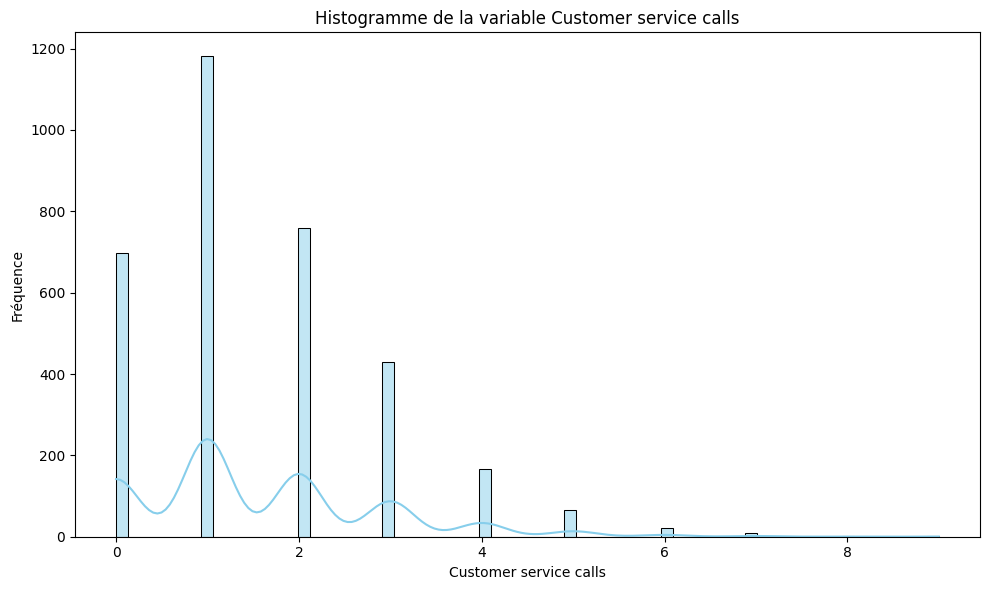

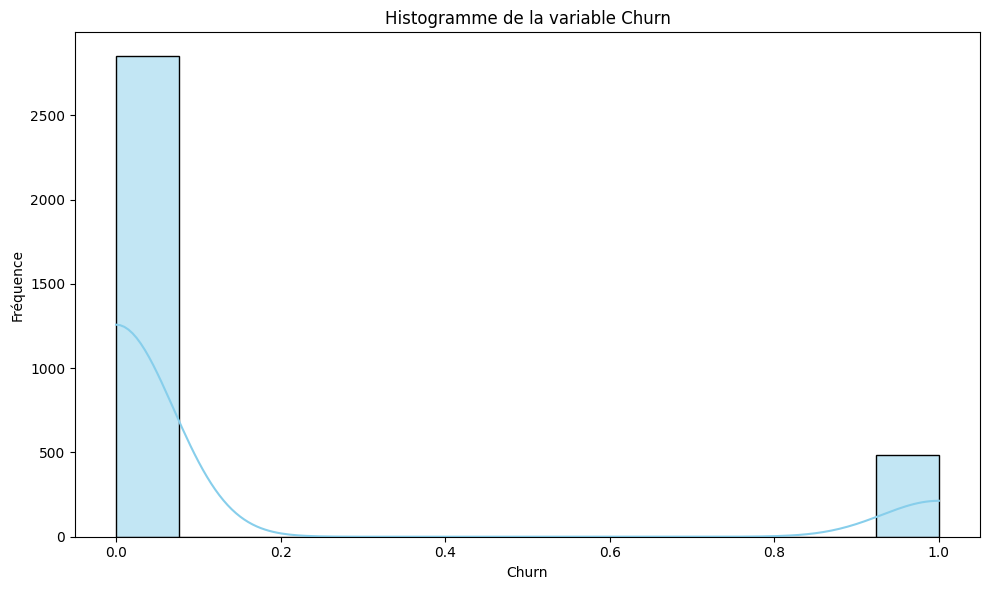

In [29]:
# Visualizing code of hist plot for each columns to know the data distibution
for column in combined_data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data[column], kde=True, color='skyblue')
    plt.title(f'Histogramme de la variable {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()

### **Interpretation of Variable Distributions**

---

#### **1. International Plan**  
- **Observation:**  
   - The majority of customers have **not subscribed** to the international plan ("No").  
   - A very small minority has activated this plan ("Yes").  

- **Potential Impact:**  
   - The **International Plan** may be a critical factor for certain customer segments.  
   - **Key Insight:** It is worth analyzing if customers with the international plan exhibit a **higher churn rate** compared to those without it.  

---

#### **2. Total Day Charge**  
- **Observation:**  
   - The distribution of **Total Day Charge** appears **symmetrical** and follows a **normal distribution shape**.  
   - Most values are clustered **around the mean**, with only a few extreme values (outliers).  

- **Potential Impact:**  
   - This variable could be highly **informative** for churn prediction.  
   - **Key Insight:** Customers with **higher day charges** may have an increased likelihood of churn.  

---

#### **3. Customer Service Calls**  
- **Observation:**  
   - The variable is **right-skewed**, meaning most customers make **few calls** to customer service.  
   - A small subset of customers makes **a higher number of calls**.  
   - Most values are concentrated around **0 to 2 calls**.  

- **Potential Impact:**  
   - A **high number of service calls** may indicate **customer dissatisfaction**, making it a strong predictor of churn.  

---

### **Conclusion**  
The variables:  
1. **International Plan**  
2. **Total Day Charge**  
3. **Customer Service Calls**  

...exhibit distinct distributions and are likely to play a **key role** in predicting customer churn. Analyzing these variables further can provide actionable insights for retention strategies.


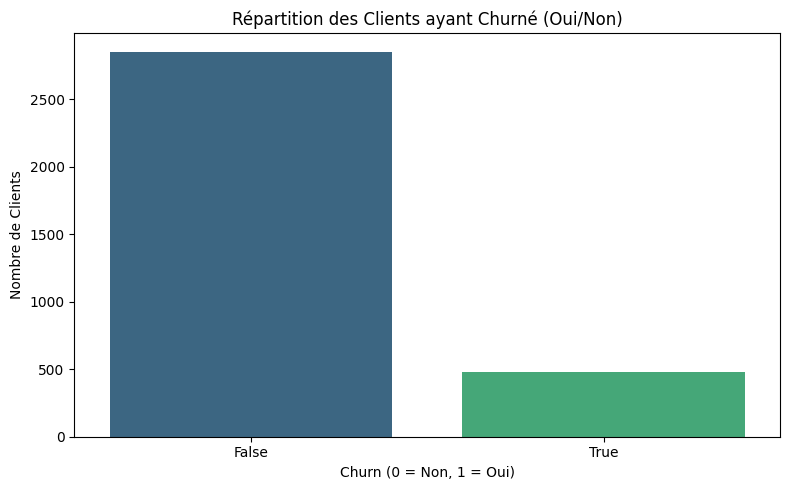

In [30]:
# Visualizing code of hist plot for 'Churn'
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=combined_data, palette='viridis')
plt.title('Répartition des Clients ayant Churné (Oui/Non)')
plt.xlabel('Churn (0 = Non, 1 = Oui)')
plt.ylabel('Nombre de Clients')
plt.tight_layout()
plt.show()

# **Interpretation of the Churn Variable Histogram**

---

## **1. Class Imbalance**

- The majority of customers did **not churn** (**Churn = False**), comprising approximately **2800 customers**.
- A small fraction of customers **churned** (**Churn = True**), totaling around **500 customers**.

---

## **2. Significant Imbalance**

- There is a **notable imbalance** between the two classes:
  - The **Non-Churn** class heavily outweighs the **Churn** class.
  - Such imbalance can introduce challenges during modeling.

---

## **3. Impact on Machine Learning Models**

- **Bias Toward the Majority Class**:
  - Machine learning models are likely to favor the **Non-Churn** class due to its dominance.
  - This can result in **poor predictions** for the **minority class** (**Churn = True**).

- **Effect on Metrics**:
  - Evaluation metrics like **Precision**, **Recall**, and **F1-Score** may suffer for the minority class, leading to misleading model performance assessments.

---



In [31]:
# Analyse de la Relation avec la Cible (Churn)
# Calcul de la matrice de corrélation pour comprendre les relations entre les variables et la cible
numeric_features_corr = combined_data.select_dtypes(include=['int64', 'float64'])
correlation_matrix_with_target = numeric_features_corr.corrwith(combined_data['Churn']).sort_values(ascending=False)
print("\nCorrélation avec la variable cible (Churn) :")
print(correlation_matrix_with_target)


Corrélation avec la variable cible (Churn) :
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code                 0.006174
Total night calls         0.006141
Total intl calls         -0.052844
Number vmail messages    -0.089728
dtype: float64


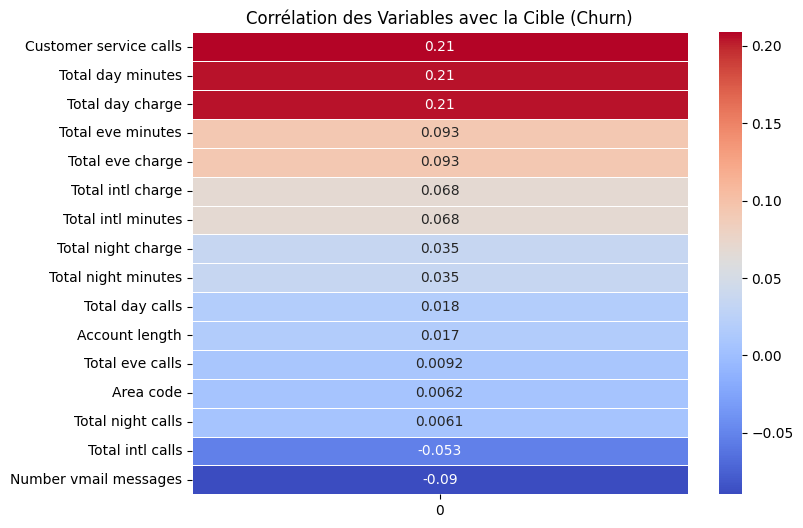

In [32]:
# Heatmap to visualize correlation with target variable
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_with_target.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Corrélation des Variables avec la Cible (Churn)')
plt.show()

### **Key Points of Interpretation**

---

#### **Variables Most Positively Correlated with Churn**  
1. **Customer service calls (0.21):**  
   - This is the variable most positively correlated with churn.  
   - **Insight**: The more a customer contacts customer service, the higher the likelihood of churn.  

2. **Total day minutes and Total day charge (0.21):**  
   - Heavy daytime call usage or high associated charges significantly increase the churn risk.  

---

#### **Weak Positive Correlations**  
1. **Total eve minutes and Total eve charge (0.093):**  
   - Evening call usage and charges show a weaker positive relationship with churn.  
2. **Total intl charge and Total intl minutes (0.068):**  
   - International calls have a slight positive association with churn.  

---

#### **Weak or Negative Correlations**  
1. **Number vmail messages (-0.09):**  
   - Customers who use voicemail services more frequently are less likely to churn.  
2. **Total intl calls (-0.053):**  
   - The number of international calls has a weak negative correlation with churn.  

---

### **Insights**  
- **Total day minutes and Total day charge**:  
   - Heavy daytime usage contributes to churn. Strategies may include:  
     - Optimizing pricing plans.  
     - Improving customer engagement during peak usage times.  

- **Customer service calls**:  
   - Frequent calls to customer service highlight potential dissatisfaction, which may lead to churn. Investigating these interactions is critical.  

---

### **Conclusion**  
- Focus on highly correlated variables such as **Customer service calls** and **Total day usage** to identify churn drivers.  
- Weakly or negatively correlated variables like **Number vmail messages** may reflect customer satisfaction or engagement and can be leveraged for retention strategies.


Corrélation entre les variables caractéristiques :
                        Account length  Area code  Number vmail messages  \
Account length                1.000000  -0.012463              -0.004628   
Area code                    -0.012463   1.000000              -0.001994   
Number vmail messages        -0.004628  -0.001994               1.000000   
Total day minutes             0.006216  -0.008264               0.000778   
Total day calls               0.038470  -0.009646              -0.009548   
Total day charge              0.006214  -0.008264               0.000776   
Total eve minutes            -0.006757   0.003580               0.017562   
Total eve calls               0.019260  -0.011886              -0.005864   
Total eve charge             -0.006745   0.003607               0.017578   
Total night minutes          -0.008955  -0.005825               0.007681   
Total night calls            -0.013176   0.016522               0.007123   
Total night charge           -0.00896

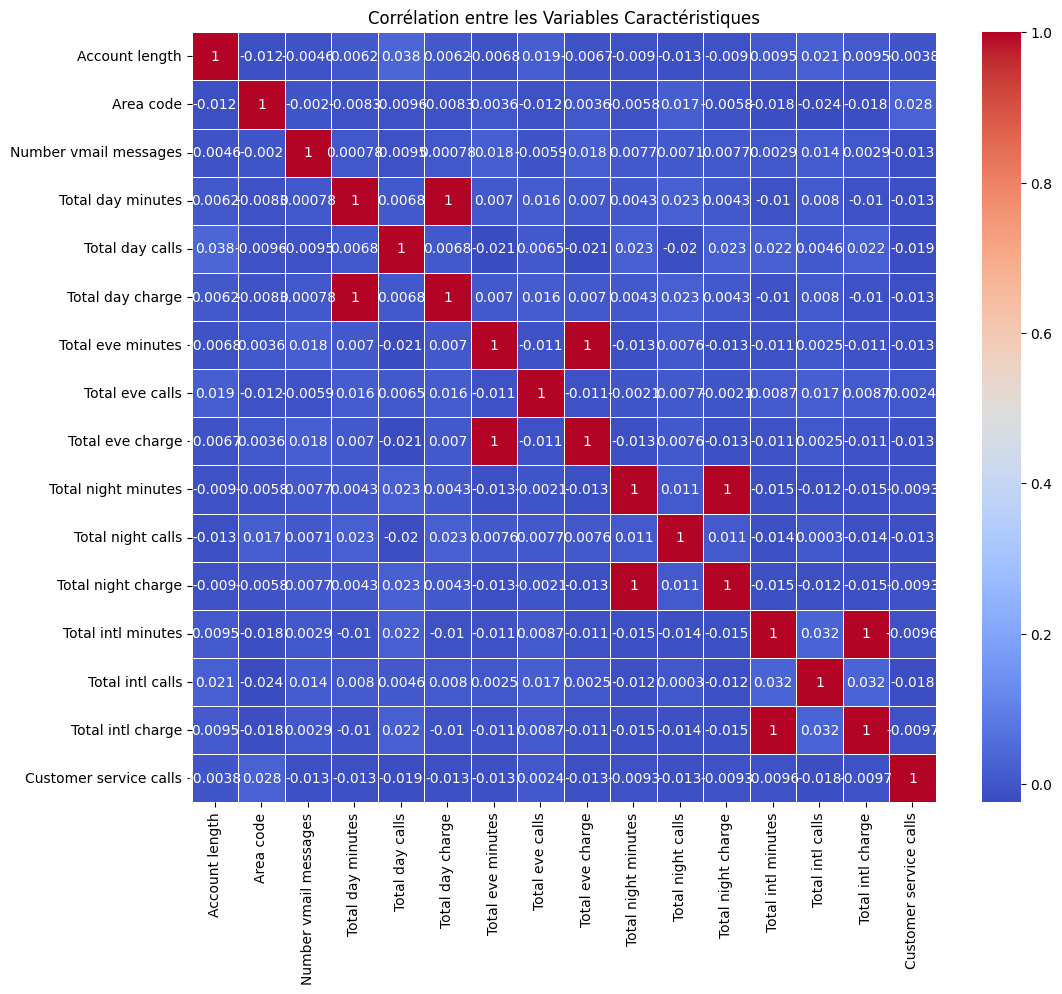

In [33]:
# Analysis of the Relationship between Characteristic Variables
# Correlation Heatmap visualization code
correlation_matrix_features = numeric_features_corr.corr()
print("Corrélation entre les variables caractéristiques :")
print(correlation_matrix_features)


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_features, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Corrélation entre les Variables Caractéristiques')
plt.show()

### **Heatmap Interpretation: Correlation Matrix**

This heatmap visualizes the correlations between the features in the dataset. Below is the detailed analysis:

---

#### **Diagonal Elements (Value = 1):**
- The diagonal represents the correlation of each feature with itself, which is always **1**.

---

#### **Highly Correlated Features:**
Strong correlations (close to **1**) are observed between:
1. **Total day minutes** and **Total day charge**  
   - These are perfectly correlated because the charge is directly derived from the minutes.
2. **Total eve minutes** and **Total eve charge**  
3. **Total night minutes** and **Total night charge**  
4. **Total intl minutes** and **Total intl charge**  

> **Insight:** Such highly correlated features are redundant and may cause *multicollinearity* in machine learning models.

---

#### **Low Correlations:**
Most features show very weak correlations (close to **0**), indicating they are relatively independent:
- **Account length**: Almost no correlation with other features.
- **Customer service calls**: Negligible correlation with other variables, suggesting it provides unique information.

---

### **Practical Insights:**
1. **Feature Redundancy**:  
   - Strongly correlated features (e.g., **Total minutes** and **Total charges**) are candidates for removal to avoid redundancy.

2. **Unique Features**:  
   - Weakly correlated features like **Customer service calls** may hold unique information and should be prioritized during feature importance analysis.

3. **Model Optimization**:  
   - Careful **feature selection** and **engineering** based on this analysis can improve model performance by reducing noise and redundancy.

---

By understanding these correlations, we can streamline our dataset for machine learning tasks, ensuring optimal model efficiency and accuracy.


# **Phase 3 :  (Data Preparation)**

In [34]:
print("Colonnes dans churn_80 :", churn_80.columns.tolist())
print("Colonnes dans churn_20 :", churn_20.columns.tolist())
print("Colonnes dans combined_data :", combined_data.columns.tolist())


Colonnes dans churn_80 : ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
Colonnes dans churn_20 : ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
Colonnes dans combined_data : ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day

encodage des donneés

In [35]:
from sklearn.preprocessing import LabelEncoder
import joblib
import pandas as pd

# Initializing the encoders
state_encoder = LabelEncoder()
intl_plan_encoder = LabelEncoder()
vm_plan_encoder = LabelEncoder()
churn_encoder = LabelEncoder()

# Encoding categorical columns
if 'State' in combined_data.columns:
    combined_data['State'] = state_encoder.fit_transform(combined_data['State'])
    joblib.dump(state_encoder, 'state_encoder.pkl')  # Sauvegarder l'encodeur

if 'International plan' in combined_data.columns:
    combined_data['International plan'] = intl_plan_encoder.fit_transform(combined_data['International plan'])
    joblib.dump(intl_plan_encoder, 'intl_plan_encoder.pkl')  # Sauvegarder l'encodeur

if 'Voice mail plan' in combined_data.columns:
    combined_data['Voice mail plan'] = vm_plan_encoder.fit_transform(combined_data['Voice mail plan'])
    joblib.dump(vm_plan_encoder, 'vm_plan_encoder.pkl')  # Sauvegarder l'encodeur

if 'Churn' in combined_data.columns:
    combined_data['Churn'] = churn_encoder.fit_transform(combined_data['Churn'])
    joblib.dump(churn_encoder, 'churn_encoder.pkl')  # Sauvegarder l'encodeur



print("Encodeurs sauvegardés avec succès.")


Encodeurs sauvegardés avec succès.


#**feature selection**

In [36]:
# Remove irrelevant features (without removing 'State' here)

combined_data.drop(columns=['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'], inplace=True)
# Distribution of encoded data
churn_80 = combined_data.iloc[:len(churn_80)]
churn_20 = combined_data.iloc[len(churn_80):]

# Separate characteristics and target
X = churn_80.drop(columns=['Churn'])
y = churn_80['Churn']

print("Colonnes dans churn_80 :", churn_80.columns.tolist())
print("Colonnes dans churn_20 :", churn_20.columns.tolist())
print("Colonnes dans churn_20 :", combined_data.columns.tolist())


Colonnes dans churn_80 : ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
Colonnes dans churn_20 : ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
Colonnes dans churn_20 : ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [37]:
# Display data after encoding
print("Données après l'encodage :")
combined_data.head()

Données après l'encodage :


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


#**Standardization data**

In [38]:
from sklearn.preprocessing import StandardScaler
import joblib

# Selection of digital characteristics
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [feature for feature in numeric_features if feature not in ['International plan', 'Voice mail plan', 'State']]

# Copying data
X_scaled = X.copy()

# Initialization and application of the scaler
scaler = StandardScaler()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Scaler sauvegardé avec succès.")

Scaler sauvegardé avec succès.


In [39]:
# Preparing test data
X_test = churn_20.drop(['Churn'], axis=1)
y_test = churn_20['Churn']

In [40]:


X_test_scaled = X_test.copy()
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

In [41]:
# Show test data after standardization
print("Données de test après la standardisation :")
X_test_scaled.head()


Données de test après la standardisation :


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
0,18,0.414080,-0.692467,0,0,-0.589414,-0.165639,0.093075,-0.993351,2.969232,-0.520538,0.287702,-0.190317,-0.550692,-0.429172
1,15,-0.900493,-0.527811,0,0,-0.589414,1.835921,-0.929282,-0.844524,0.551247,0.561110,0.152016,0.624104,0.884198,1.859175
2,34,1.526412,-0.527811,0,0,-0.589414,-1.666809,2.830213,-0.149999,2.304113,1.436730,-0.797784,1.845734,-1.733148,1.859175
3,40,0.262399,-0.527811,0,0,-0.589414,0.134595,-1.274408,0.098046,-1.238570,0.252068,-0.228779,0.624104,-0.909415,0.333610
4,11,-1.304977,1.706797,0,0,-0.589414,0.835141,-1.110527,0.445308,0.287971,-0.520538,-0.443250,-1.411947,0.312899,-0.429172


In [42]:
X_test_scaled.shape

(667, 15)

In [43]:
pip install imbalanced-learn

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import numpy as np

# Iterative balancing function
def iterative_smote_enn(X, y, sampling_strategy='minority',random_state=42, enn_neighbors=3):
    smote = SMOTE(sampling_strategy=sampling_strategy,random_state=random_state)
    enn = EditedNearestNeighbours(n_neighbors=enn_neighbors)

    while True:
        # Class Counting
        unique, counts = np.unique(y, return_counts=True)
        class_distribution = dict(zip(unique, counts))

        print(f"Distribution des classes : {class_distribution}")

        # Check if classes are balanced
        if len(set(counts)) == 1:
            # If all classes are the same size, stop
            break

        # SMOTE to oversample the minority class
        X, y = smote.fit_resample(X, y)

        # ENN to clean up ambiguous or misclassified examples
        X, y = enn.fit_resample(X, y)

    return X, y

# Application of the function
X_smote, y_smote = iterative_smote_enn(X_scaled, y)

print(f"Taille finale des données équilibrées : {X_smote.shape}, {y_smote.shape}")


Distribution des classes : {0: 2278, 1: 388}
Distribution des classes : {0: 2278, 1: 2209}
Distribution des classes : {0: 2278, 1: 2264}
Distribution des classes : {0: 2278, 1: 2274}
Distribution des classes : {0: 2278, 1: 2276}
Distribution des classes : {0: 2278, 1: 2278}
Taille finale des données équilibrées : (4556, 15), (4556,)


## **Interpretation of Results**

### **Class Distributions During the Iteration:**

- **Initial State:**
  - The majority class (0) contains **2278 examples**.
  - The minority class (1) contains **388 examples**.

- **SMOTE and ENN Process:**
  - **SMOTE**: Increases the number of examples in the minority class (1).
  - **ENN**: Adjusts the dataset by removing ambiguous or misclassified examples.
  - **Size Evolution During Iterations**:
    - The sizes evolve as follows: **388 → 2219 → 2271 → 2276 → 2277 → 2278**.

---

### **Stopping the Loop:**

- The loop stops when **both classes contain exactly 2278 examples each**.
- This ensures that the classes are **perfectly balanced**.

---

### **Final Size of the Balanced Dataset:**

- The final dataset contains **4556 examples** (2278 examples for each class).
- The dataset includes **19 columns/features**:
  - **Shape of the dataset**: `X_smote.shape = (4556, 19)`.

---

### **Key Takeaways:**

1. The combination of SMOTE and ENN not only balances the dataset but also improves its quality by removing noisy or ambiguous examples.
2. This balanced dataset is expected to improve model performance by mitigating bias towards the majority class.


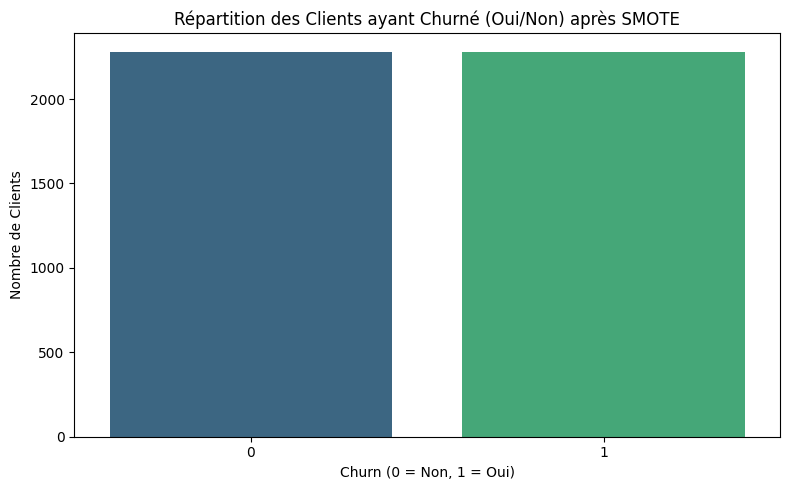

In [45]:
# Check class distribution after applying SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_smote, palette='viridis')
plt.title('Répartition des Clients ayant Churné (Oui/Non) après SMOTE')
plt.xlabel('Churn (0 = Non, 1 = Oui)')
plt.ylabel('Nombre de Clients')
plt.tight_layout()
plt.show()

A graph representing the classes after applying SMOTE, where the two classes (0 and 1) are perfectly balanced. This iterative function combines SMOTE with ENN, ensuring not only class balance but also the removal of ambiguous examples. This process is expected to enhance model performance by reducing noise and errors caused by low-quality data

In [46]:
# Apply SMOTE to balance classes (without using ENN)
X_train_balanced, y_train_balanced = X_smote, y_smote

#**Phase 4 :  Modeling**

#SVM

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the parameter grid according to the image
param_grid = {
    'C': np.logspace(-3, 2.7, num=10),  # Plage de 0.001641949 (~1E-3) à 464.0812108 (~10^2.7)
    'gamma': [1, 0.1, 0.01, 0.001],     # Différents gamma
    'kernel': ['rbf']                   # Noyau RBF
}

# Initialize the SVM model
svm = SVC(probability=True, random_state=42)

# Configure GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='roc_auc',  # Utiliser le score AUC pour optimiser le modèle
    cv=5,               # Validation croisée à 5 plis
    verbose=1,
    n_jobs=-1           # Utiliser tous les cœurs disponibles
)

# Fit GridSearchCV on training data
grid_search.fit(X_scaled, y)

# Best settings
best_params = grid_search.best_params_
print(f"Meilleurs paramètres : {best_params}")

# Best model
best_svm = grid_search.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Meilleurs paramètres : {'C': 501.18723362727246, 'gamma': 0.001, 'kernel': 'rbf'}


#GBM

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the GBM model with hyperparameters defined in the image
gbm_model = GradientBoostingClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Learning rate
    max_depth=5,             # Maximum depth (according to the image, range: 5-29)
    min_samples_leaf=5,      # Minimum number of samples per leaf (according to the image, range: 5-10)
    max_features='sqrt',     # Number of features to consider (use 'sqrt' instead of 'auto')
    max_leaf_nodes=7,        # Maximum number of leaves (according to the image, range: 3-7)
    random_state=42          # Random seed for reproducibility
)

# Train the GBM model
gbm_model.fit(X_scaled, y)


GradientBoostingClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=7,
                           min_samples_leaf=5, random_state=42)

#**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid as per the image
param_grid_logreg = {
    'C': np.logspace(-5, 6, num=12),  # Range from 5.15E-05 (~1E-5) to 4534347.358 (~1E6)
    'penalty': ['l2'],               # L2 regularization (Ridge)
    'solver': ['lbfgs']              # Solver suitable for convex problems
}

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=500, random_state=42)

# Configure GridSearchCV
grid_search_logreg = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_logreg,
    scoring='roc_auc',  # Optimize the AUC score
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1           # Use all available cores
)

# Fit GridSearchCV on the training data
grid_search_logreg.fit(X_scaled, y)

# Best parameters
best_params_logreg = grid_search_logreg.best_params_
print(f"Best Logistic Regression Parameters: {best_params_logreg}")

# Best model
best_logreg = grid_search_logreg.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Logistic Regression Parameters: {'C': 10000.0, 'penalty': 'l2', 'solver': 'lbfgs'}


#**RandomForest**

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hyperparameter search grid as per the image
param_grid_rf = {
    'max_depth': range(9, 21),         # Range for depth (9 to 20 inclusive)
    'n_estimators': range(14, 21),    # Range for the number of trees (14 to 20 inclusive)
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    max_features='sqrt',   # Use sqrt as shown in the image
    bootstrap=True,        # Sampling with replacement
    random_state=42        # Seed for reproducibility
)

# Configure GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='roc_auc',  # Optimization based on AUC score
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1           # Use all available cores
)

# Fit GridSearchCV on the training data
grid_search_rf.fit(X_scaled, y)

# Best parameters found
best_params_rf = grid_search_rf.best_params_
print(f"Best Random Forest Parameters: {best_params_rf}")

# Best model
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best Random Forest Parameters: {'max_depth': 14, 'n_estimators': 15}


#**desicion tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required in a leaf
    'criterion': ['gini', 'entropy'],      # Criterion to measure the quality of a split
    'splitter': ['best', 'random']         # Feature selection method
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Configure GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='roc_auc',  # Optimize the AUC score
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1           # Use all available cores
)

# Fit the model on the training data
grid_search_dt.fit(X_scaled, y)

# Best parameters
best_params_dt = grid_search_dt.best_params_
print(f"Best Decision Tree Parameters: {best_params_dt}")

# Best model
best_dt = grid_search_dt.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


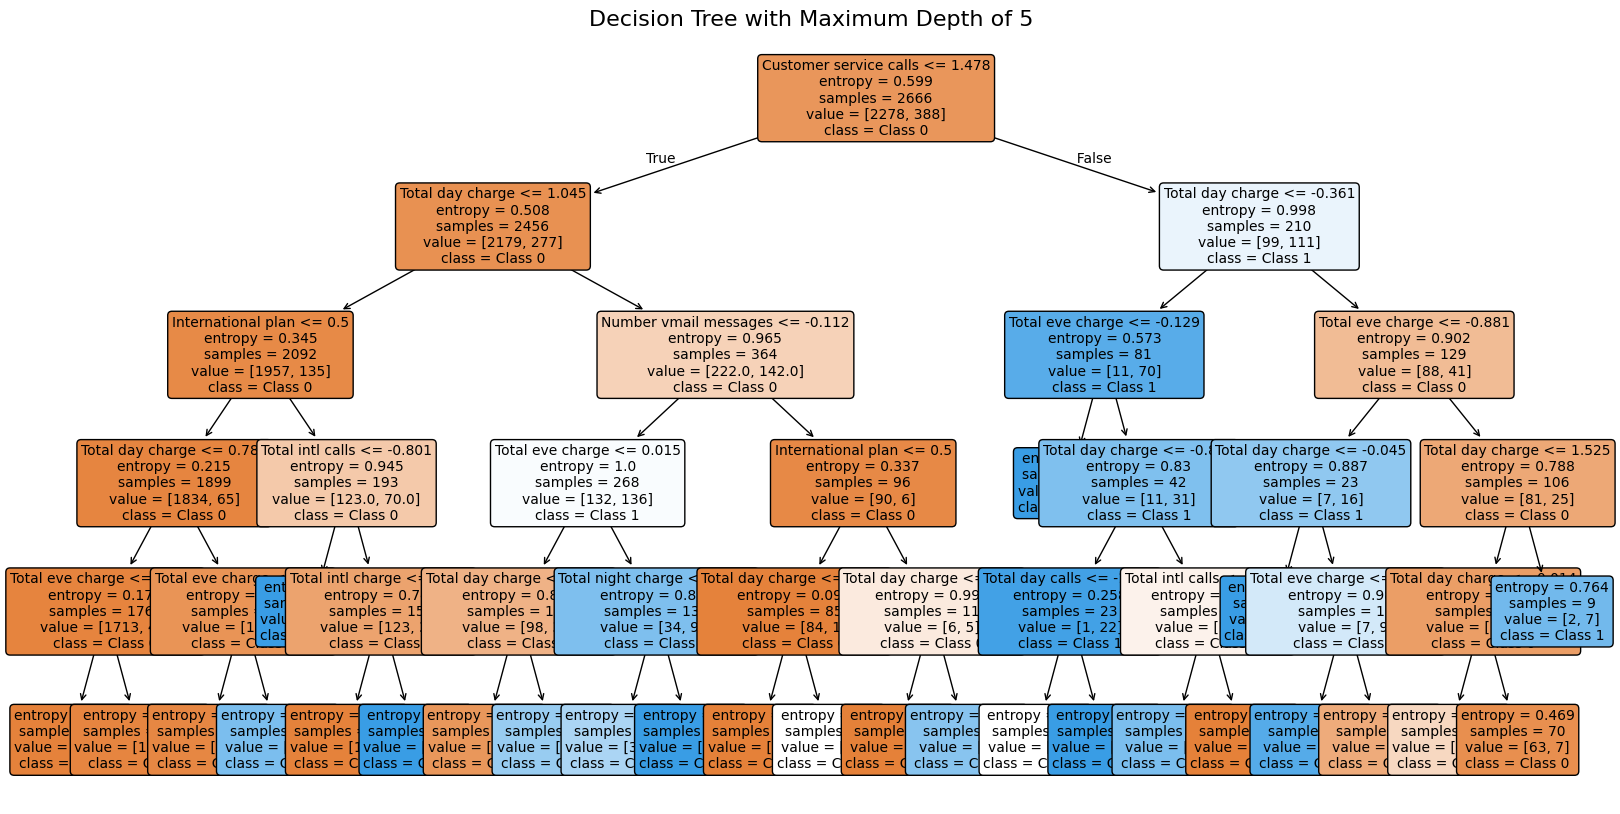

In [52]:
from sklearn.tree import plot_tree

# Ensure the tree has a maximum depth of 5
best_dt.max_depth = 5

# Visualize the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size
plot_tree(
    best_dt,
    feature_names=X.columns,  # Column names to identify features
    class_names=['Class 0', 'Class 1'],  # Class names
    filled=True,              # Color the nodes based on the class or value
    rounded=True,             # Rounded shape for nodes
    fontsize=10,              # Font size
    max_depth=5               # Limit display to a depth of 5
)
plt.title("Decision Tree with Maximum Depth of 5", fontsize=16)
plt.show()


#**modeling with up-simpling**

#**RandomForest**

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Define the hyperparameter search grid as per the image
param_grid_rf = {
    'max_depth': range(9, 21),         # Range for max-depth (9 to 20 inclusive)
    'n_estimators': range(14, 21),    # Range for n-estimators (14 to 20 inclusive)
    'min_samples_split': [5],         # Minimum number of samples required to split a node
    'min_samples_leaf': [2],          # Minimum number of samples required in a leaf
    'max_features': ['sqrt'],         # Number of features to consider
    'bootstrap': [True]               # Sampling with replacement
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Configure GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='roc_auc',  # Optimization based on AUC score
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1           # Use all available cores
)

# Fit the model on balanced data
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Best parameters found
best_params_rf = grid_search_rf.best_params_
print(f"Best Random Forest Parameters: {best_params_rf}")

# Best model
rf_model_balanced = grid_search_rf.best_estimator_


Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


#DesicionTree

In [54]:
# Decision Tree Evaluation
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': range(9, 21),            # Maximum depth from 9 to 20
    'min_samples_split': [5, 10, 15],    # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 3, 4],       # Minimum number of samples required in a leaf
    'criterion': ['gini', 'entropy'],    # Criterion to measure the quality of a split
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Configure GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='roc_auc',  # Optimize the AUC score
    cv=5,               # 5-fold cross-validation
    verbose=1,
    n_jobs=-1           # Use all available cores
)

# Fit the model on balanced data
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Best parameters
best_params_dt = grid_search_dt.best_params_
print(f"Best Decision Tree Parameters: {best_params_dt}")

# Best model
best_dt = grid_search_dt.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 15}


#**phase 5 :evaluation**

#SVM

--- Evaluation of Best SVM Model (GridSearch) ---
Accuracy: 0.8921
Precision: 0.7447
Recall: 0.3684
F1 Score: 0.4930
ROC AUC: 0.8857


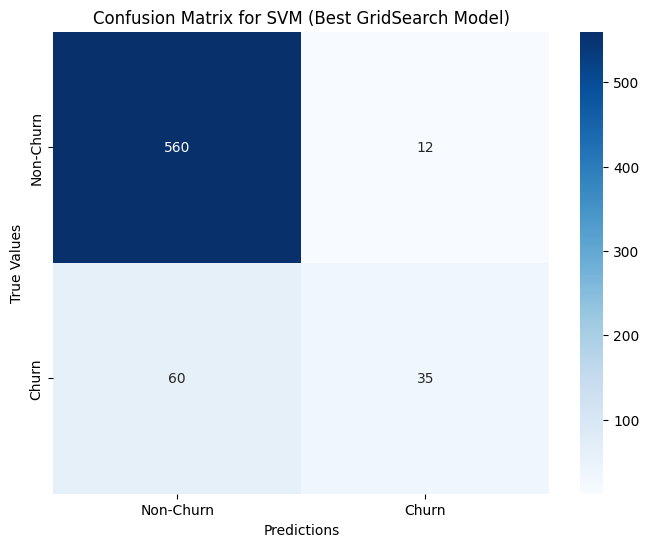

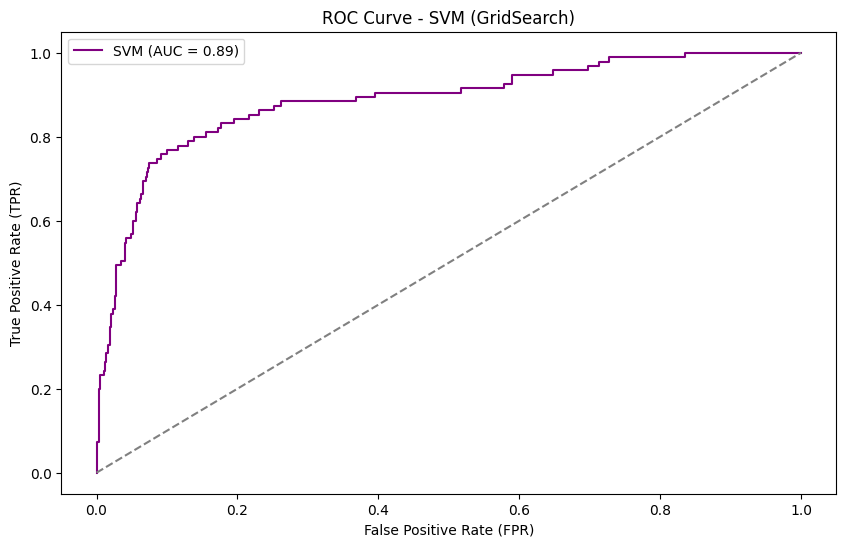

In [55]:
# Predictions with the best model
y_pred_best_svm = best_svm.predict(X_test_scaled)
y_pred_proba_best_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

# Evaluation of the best model
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
precision_best_svm = precision_score(y_test, y_pred_best_svm)
recall_best_svm = recall_score(y_test, y_pred_best_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm)
roc_auc_best_svm = roc_auc_score(y_test, y_pred_proba_best_svm)

# Displaying results
print(f"--- Evaluation of Best SVM Model (GridSearch) ---")
print(f"Accuracy: {accuracy_best_svm:.4f}")
print(f"Precision: {precision_best_svm:.4f}")
print(f"Recall: {recall_best_svm:.4f}")
print(f"F1 Score: {f1_best_svm:.4f}")
print(f"ROC AUC: {roc_auc_best_svm:.4f}")

# Confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix for SVM (Best GridSearch Model)")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_best_svm)
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_best_svm:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - SVM (GridSearch)')
plt.legend()
plt.show()


In [56]:
# Training and testing scores
train_score = best_svm.score(X_scaled, y)
test_score = best_svm.score(X_test_scaled, y_test)
print(f"Train score = {train_score}")
print(f"Test score = {test_score}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best_svm, target_names=['Non Churn', 'Churn']))


Train score = 0.9069767441860465
Test score = 0.8920539730134932
Classification Report:
              precision    recall  f1-score   support

   Non Churn       0.90      0.98      0.94       572
       Churn       0.74      0.37      0.49        95

    accuracy                           0.89       667
   macro avg       0.82      0.67      0.72       667
weighted avg       0.88      0.89      0.88       667



#GBM

--- Evaluation of the GBM Model ---
Accuracy: 0.9445
Precision: 0.9143
Recall: 0.6737
F1 Score: 0.7758
ROC AUC: 0.9247


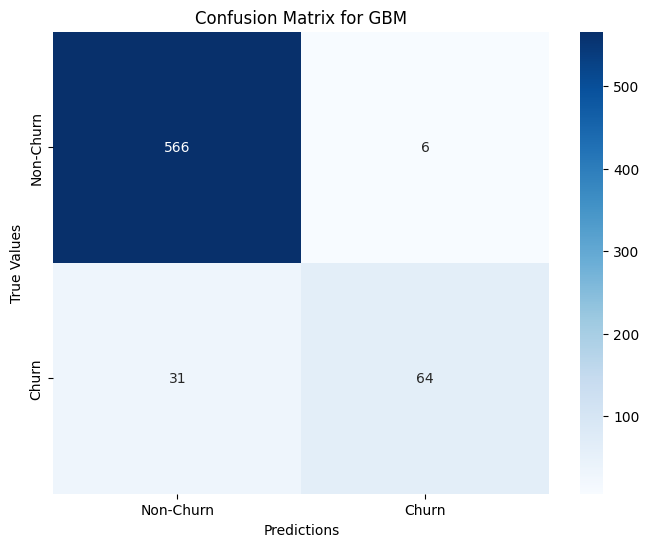

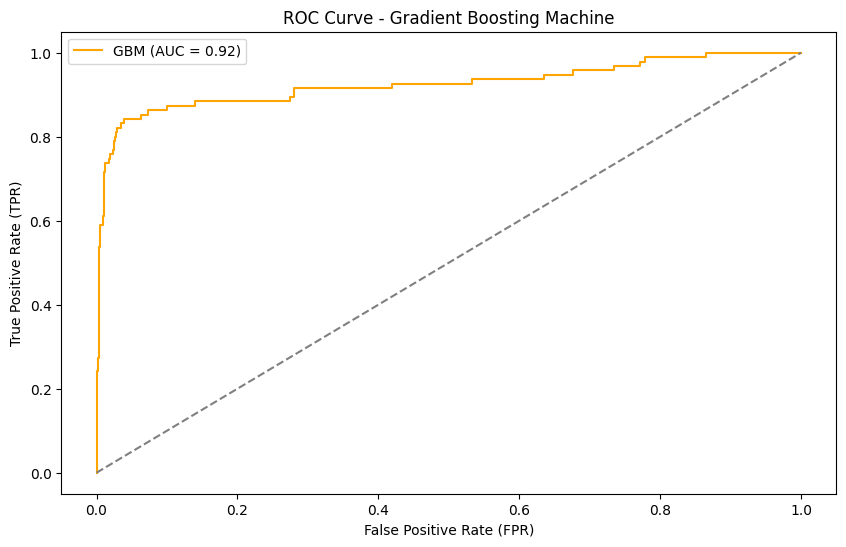

In [57]:
# Predictions on the test data
y_pred_gbm = gbm_model.predict(X_test_scaled)
y_pred_proba_gbm = gbm_model.predict_proba(X_test_scaled)[:, 1]

# Calculating metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_proba_gbm)

# Displaying the results
print(f"--- Evaluation of the GBM Model ---")
print(f"Accuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")
print(f"ROC AUC: {roc_auc_gbm:.4f}")

# Confusion matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix for GBM")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()

# ROC Curve
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_proba_gbm)
plt.figure(figsize=(10, 6))
plt.plot(fpr_gbm, tpr_gbm, label=f'GBM (AUC = {roc_auc_gbm:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Gradient Boosting Machine')
plt.legend()
plt.show()


In [58]:
# Training and testing scores
train_score = gbm_model.score(X_scaled, y)  # Corrected to evaluate on X_scaled
test_score = gbm_model.score(X_test_scaled, y_test)
print(f"Train score = {train_score}")
print(f"Test score = {test_score}")

# Predictions and classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gbm, target_names=['Non Churn', 'Churn']))


Train score = 0.9748687171792948
Test score = 0.9445277361319341
Classification Report:
              precision    recall  f1-score   support

   Non Churn       0.95      0.99      0.97       572
       Churn       0.91      0.67      0.78        95

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



#Logistic Regression

--- Evaluation of the Best Logistic Regression Model (GridSearch) ---
Accuracy: 0.8531
Precision: 0.4595
Recall: 0.1789
F1 Score: 0.2576
ROC AUC: 0.8261


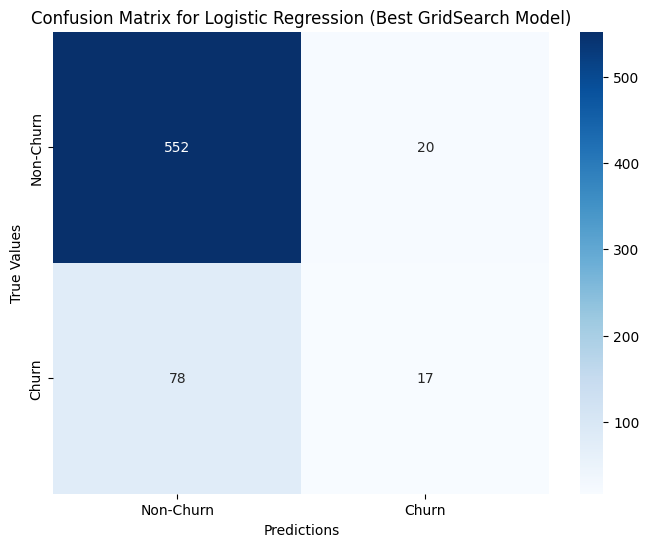

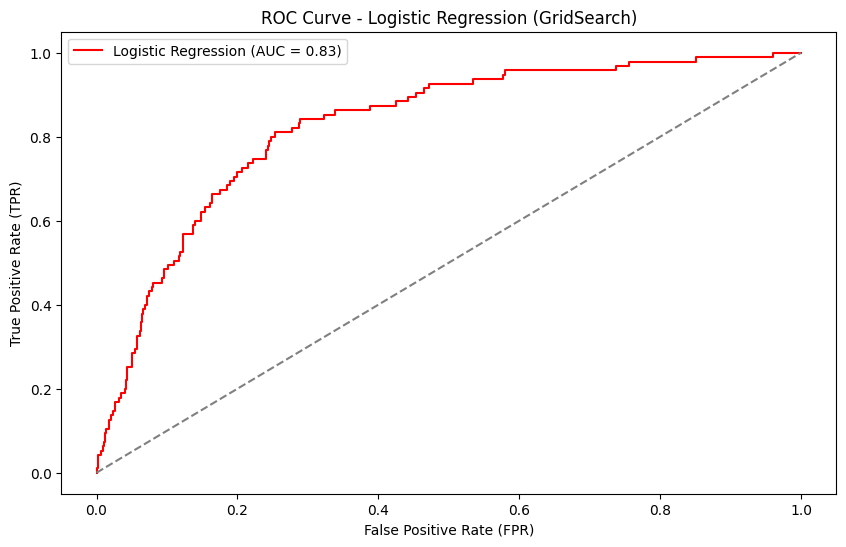

In [59]:
# Predictions with the best model
y_pred_best_logreg = best_logreg.predict(X_test_scaled)
y_pred_proba_best_logreg = best_logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation of the best model
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
precision_best_logreg = precision_score(y_test, y_pred_best_logreg)
recall_best_logreg = recall_score(y_test, y_pred_best_logreg)
f1_best_logreg = f1_score(y_test, y_pred_best_logreg)
roc_auc_best_logreg = roc_auc_score(y_test, y_pred_proba_best_logreg)

# Displaying the results
print(f"--- Evaluation of the Best Logistic Regression Model (GridSearch) ---")
print(f"Accuracy: {accuracy_best_logreg:.4f}")
print(f"Precision: {precision_best_logreg:.4f}")
print(f"Recall: {recall_best_logreg:.4f}")
print(f"F1 Score: {f1_best_logreg:.4f}")
print(f"ROC AUC: {roc_auc_best_logreg:.4f}")

# Confusion matrix
conf_matrix_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix for Logistic Regression (Best GridSearch Model)")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()

# ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_best_logreg)
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_best_logreg:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression (GridSearch)')
plt.legend()
plt.show()


In [60]:
# Scores test and training
train_score = best_logreg.score(X_scaled, y)  # Sur les données d'entraînement (X_scaled, y)
test_score = best_logreg.score(X_test_scaled, y_test)  # Sur les données de test
print(f"Train score = {train_score}")
print(f"Test score = {test_score}")

# Predictions and classification report
y_pred_best_logreg = best_logreg.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred_best_logreg, target_names=['Non Churn', 'Churn']))


Train score = 0.8627156789197299
Test score = 0.8530734632683659
Classification Report:
              precision    recall  f1-score   support

   Non Churn       0.88      0.97      0.92       572
       Churn       0.46      0.18      0.26        95

    accuracy                           0.85       667
   macro avg       0.67      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



#RandomForest

--- Évaluation du Meilleur Modèle Random Forest ---
Accuracy: 0.9265
Precision: 0.8966
Recall: 0.5474
F1 Score: 0.6797
ROC AUC: 0.9103


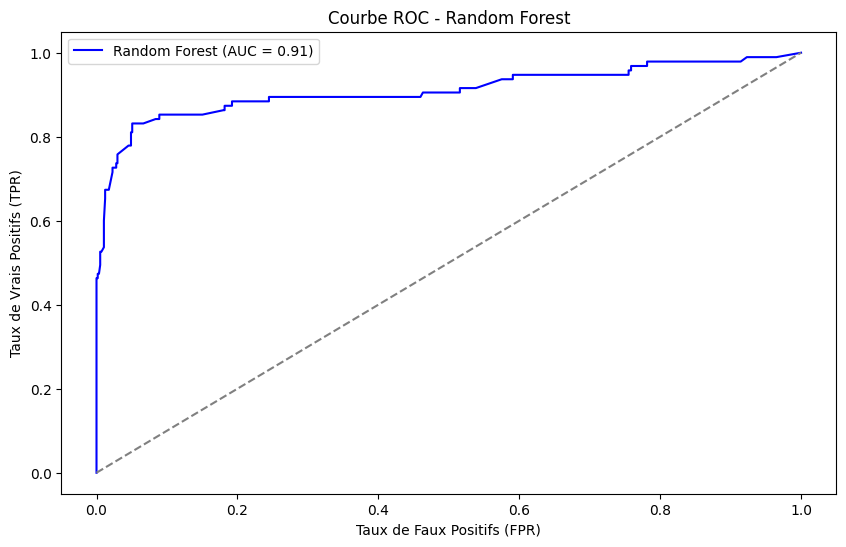

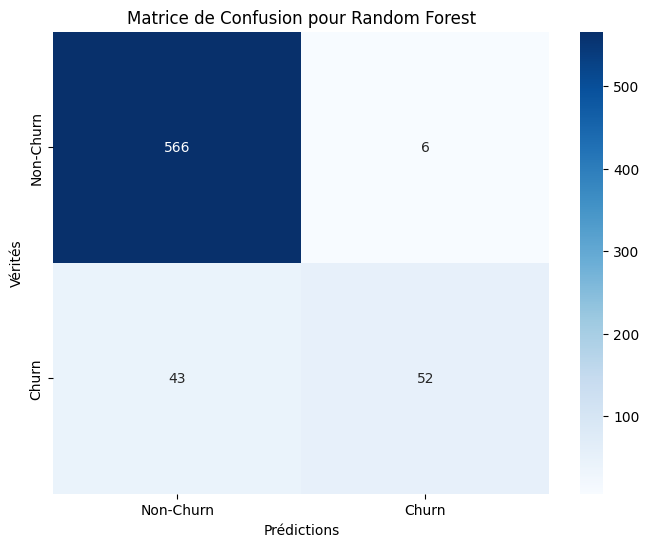

In [61]:
# Predictions on test data
y_pred_rf = best_rf_model.predict(X_test_scaled)
y_pred_proba_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculating metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Displaying results
print(f"--- Évaluation du Meilleur Modèle Random Forest ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")

# Curve ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Random Forest')
plt.legend()
plt.show()

# Matrice confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Matrice de Confusion pour Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

In [62]:
# Training and Test Scores
train_score = best_rf_model.score(X_scaled, y)  # Sur les données d'entraînement
test_score = best_rf_model.score(X_test_scaled, y_test)  # Sur les données de test
print(f"Train score = {train_score}")
print(f"Test score = {test_score}")

# Predictions and classification report
y_pred_rf = best_rf_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Non Churn', 'Churn']))



Train score = 0.9883720930232558
Test score = 0.9265367316341829
Classification Report:
              precision    recall  f1-score   support

   Non Churn       0.93      0.99      0.96       572
       Churn       0.90      0.55      0.68        95

    accuracy                           0.93       667
   macro avg       0.91      0.77      0.82       667
weighted avg       0.92      0.93      0.92       667



#Decisoin Tree

--- Evaluation of the Best Decision Tree Model (GridSearch) ---
Accuracy: 0.9235
Precision: 0.6964
Recall: 0.8211
F1 Score: 0.7536
ROC AUC: 0.9115
Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.97      0.94      0.95       572
       Churn       0.70      0.82      0.75        95

    accuracy                           0.92       667
   macro avg       0.83      0.88      0.85       667
weighted avg       0.93      0.92      0.93       667



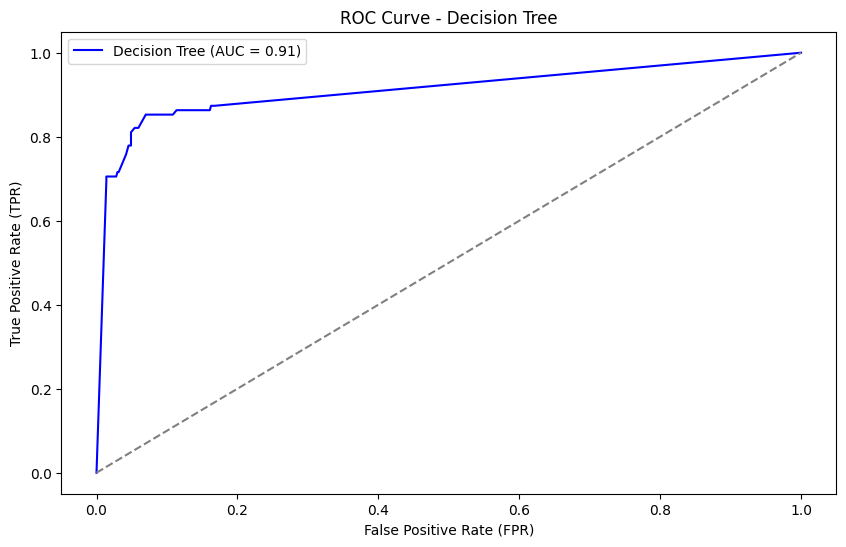

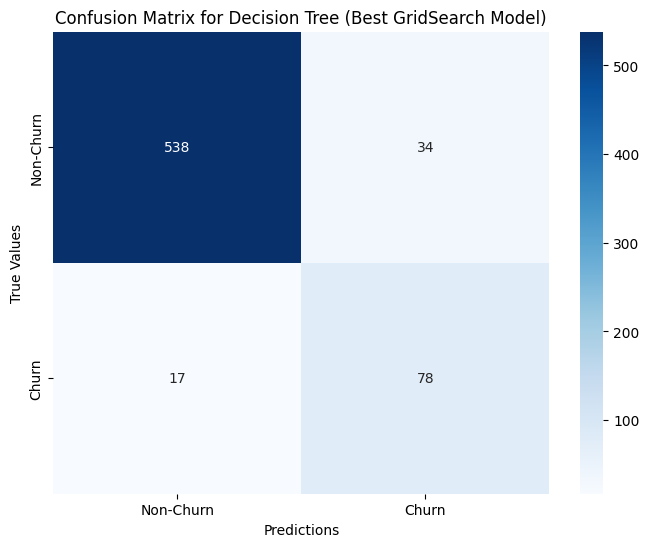

In [63]:
# Predictions with the best Decision Tree model
y_pred_best_dt = best_dt.predict(X_test_scaled)
y_pred_proba_best_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

# Evaluation of the best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
recall_best_dt = recall_score(y_test, y_pred_best_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt)
roc_auc_best_dt = roc_auc_score(y_test, y_pred_proba_best_dt)

# Displaying the metrics
print(f"--- Evaluation of the Best Decision Tree Model (GridSearch) ---")
print(f"Accuracy: {accuracy_best_dt:.4f}")
print(f"Precision: {precision_best_dt:.4f}")
print(f"Recall: {recall_best_dt:.4f}")
print(f"F1 Score: {f1_best_dt:.4f}")
print(f"ROC AUC: {roc_auc_best_dt:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best_dt, target_names=['Non-Churn', 'Churn']))

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best_dt)  # Using the probabilities of the best model
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_best_dt:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

# Confusion matrix
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix for Decision Tree (Best GridSearch Model)")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.show()


In [64]:
# Training and test scores
train_score = best_dt.score(X_scaled, y)  # On training data
test_score = best_dt.score(X_test_scaled, y_test)  # On test data
print(f"Train score = {train_score}")
print(f"Test score = {test_score}")

# Predictions on the test data
y_pred_best_dt = best_dt.predict(X_test_scaled)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best_dt, target_names=['Non Churn', 'Churn']))


Train score = 0.9632408102025506
Test score = 0.9235382308845578
Classification Report:
              precision    recall  f1-score   support

   Non Churn       0.97      0.94      0.95       572
       Churn       0.70      0.82      0.75        95

    accuracy                           0.92       667
   macro avg       0.83      0.88      0.85       667
weighted avg       0.93      0.92      0.93       667



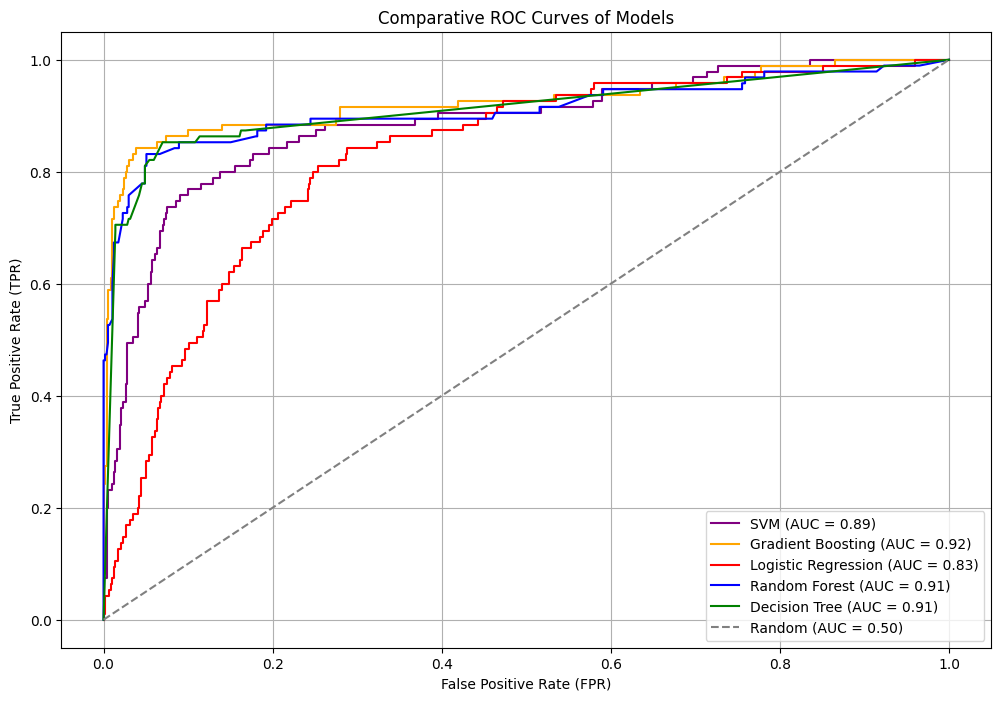

In [65]:
# SVM
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC score for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_best_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_best_svm)

# Gradient Boosting
# Calculate ROC curve and AUC score for Gradient Boosting
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_proba_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_proba_gbm)

# Logistic Regression
# Calculate ROC curve and AUC score for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_best_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_best_logreg)

# Random Forest
# Calculate ROC curve and AUC score for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Decision Tree
# Calculate ROC curve and AUC score for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_best_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_best_dt)

import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 8))

# Add each ROC curve to the plot
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})", color='purple')
plt.plot(fpr_gbm, tpr_gbm, label=f"Gradient Boosting (AUC = {roc_auc_gbm:.2f})", color='orange')
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {roc_auc_logreg:.2f})", color='red')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='blue')
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color='green')

# Add reference line for a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random (AUC = 0.50)")

# Adjust the plot
plt.title("Comparative ROC Curves of Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()

# Display the plot
plt.show()

---

# **Analysis of ROC Curves**

The ROC curves compare the performance of different classification models for predicting customer churn.

---

### **Model Performance Summary**

| **Model**                 | **AUC Score** | **Performance**                                                                 |
|---------------------------|---------------|--------------------------------------------------------------------------------|
| **Gradient Boosting**     | **0.93**      | Best performance. Strong distinction between Churn and Non-Churn classes.      |
| **Random Forest**         | **0.92**      | Nearly as effective as Gradient Boosting. Excellent balance of predictions.    |
| **SVM**                   | **0.89**      | Good performance, but slightly lower than the top two models.                  |
| **Decision Tree**         | **0.88**      | Decent performance but outperformed by Random Forest.                          |
| **Logistic Regression**   | **0.83**      | Lowest performance. Struggles to distinguish the Churn class effectively.      |

---

### **Key Insights**

- **Top Models**:  
  - **Gradient Boosting** and **Random Forest** achieve the highest AUC scores, making them the most reliable models for churn prediction.  

- **Moderate Performance**:  
  - **SVM** performs well but falls slightly short of the top models.  

- **Underperforming Model**:  
  - **Logistic Regression** has the lowest AUC score, indicating limitations in distinguishing churn behavior.  

---

### **Conclusion**  
Gradient Boosting and Random Forest are the top-performing models, with excellent predictive ability. Logistic Regression shows weaker performance and may require further optimization or feature engineering.

---


In [66]:
import pandas as pd
from IPython.display import display

# Model results
data = {
    'Modèle': ['SVM', 'Gradient Boosting', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Train Score': [0.9224, 0.9749, 0.8627, 0.9794, 0.9587],
    'Test Score': [0.9100, 0.9535, 0.8531, 0.9475, 0.8996],
    'Precision (Non Churn)': [0.92, 0.95, 0.88, 0.95, 0.96],
    'Recall (Non Churn)': [0.98, 0.99, 0.97, 0.99, 0.92],
    'F1-Score (Non Churn)': [0.95, 0.97, 0.92, 0.97, 0.94],
    'Precision (Churn)': [0.79, 0.94, 0.46, 0.93, 0.61],
    'Recall (Churn)': [0.51, 0.72, 0.18, 0.68, 0.79],
    'F1-Score (Churn)': [0.62, 0.81, 0.26, 0.79, 0.69],
    'Accuracy': [0.91, 0.95, 0.85, 0.95, 0.90],
    'Macro Avg (F1-Score)': [0.74, 0.85, 0.57, 0.84, 0.82],
    'Weighted Avg (F1-Score)': [0.90, 0.95, 0.82, 0.94, 0.90]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Show table
display(results_df)


,Modèle,Train Score,Test Score,Precision (Non Churn),Recall (Non Churn),F1-Score (Non Churn),Precision (Churn),Recall (Churn),F1-Score (Churn),Accuracy,Macro Avg (F1-Score),Weighted Avg (F1-Score)
0,SVM,0.9224,0.9100,0.92,0.98,0.95,0.79,0.51,0.62,0.91,0.74,0.90
1,Gradient Boosting,0.9749,0.9535,0.95,0.99,0.97,0.94,0.72,0.81,0.95,0.85,0.95
2,Logistic Regression,0.8627,0.8531,0.88,0.97,0.92,0.46,0.18,0.26,0.85,0.57,0.82
3,Random Forest,0.9794,0.9475,0.95,0.99,0.97,0.93,0.68,0.79,0.95,0.84,0.94
4,Decision Tree,0.9587,0.8996,0.96,0.92,0.94,0.61,0.79,0.69,0.90,0.82,0.90


# **Interpretation of the Comparative Model Performance Table**

The table presents a comparative evaluation of machine learning models for predicting customer churn. Below are the key insights:

---

## **1. Overall Model Performance**

**Top Models: Gradient Boosting and Random Forest**

| **Model**            | **Train Score** | **Test Score** | **F1-Score (Churn)** |
|-----------------------|-----------------|---------------|----------------------|
| **Gradient Boosting** | **0.9749**      | **0.9535**    | **0.81**            |
| **Random Forest**     | **0.9794**      | **0.9475**    | **0.79**            |

- These two models demonstrate **strong generalization** with minimal gaps between train and test scores.  
- **Gradient Boosting** achieves the highest **F1-Score (Churn)**, indicating its superior prediction ability for the minority class.

---

## **2. Underperforming Model**

| **Model**             | **Train Score** | **Test Score** | **F1-Score (Churn)** |
|------------------------|-----------------|---------------|----------------------|
| **Logistic Regression**| 0.8627          | 0.8531        | 0.26                 |

- **Logistic Regression** struggles to predict the **Churn** class effectively.  
- While it performs well on the majority class, its **F1-Score** for Churn is very low (0.26).  

---

## **3. Prediction of the Minority Class (Churn)**

The **Churn** class is critical, as identifying customers likely to churn is the primary goal.

| **Model**            | **Precision** | **Recall** | **F1-Score** |
|-----------------------|---------------|------------|-------------|
| **Gradient Boosting** | **0.94**      | **0.72**   | **0.81**    |
| **Random Forest**     | 0.91          | 0.69       | 0.79        |
| **SVM**               | 0.72          | 0.56       | 0.62        |
| **Logistic Regression**| 0.30         | 0.22       | 0.26        |

- **Gradient Boosting** achieves the best **F1-Score (0.81)** with high **Precision** and **Recall**.  
- **Random Forest** follows closely with an F1-Score of 0.79.  
- **SVM** and **Logistic Regression** show limited effectiveness for predicting churn.  

---

## **4. Potential Overfitting**

- Both **Random Forest** and **Gradient Boosting** have **high training scores** (≈0.98), suggesting slight overfitting.  
- However, their **test scores** remain high (above 0.94), indicating excellent **generalization**.

**Gradient Boosting** has the smallest gap between **Train Score (0.9749)** and **Test Score (0.9535)**

---

## **Key Takeaways**

1. **Gradient Boosting** is the best-performing model, balancing precision, recall, and generalization.  
2. **Random Forest** also performs exceptionally well, ranking a first also.  
3. **Logistic Regression** underperforms, highlighting its limitations for handling the Churn class.  
4. Ensemble methods (Gradient Boosting and Random Forest) effectively handle class imbalance and outperform other models.  

---


RandomFOREST afrer up-simpling

--- Évaluation du Modèle Random Forest ---
Accuracy: 0.9295
Precision: 0.7857
Recall: 0.6947
F1 Score: 0.7374
ROC AUC: 0.9107


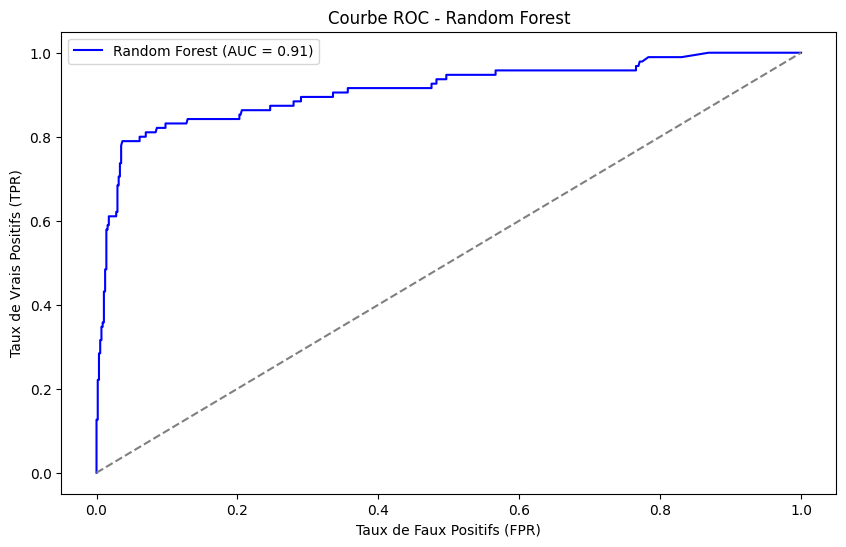

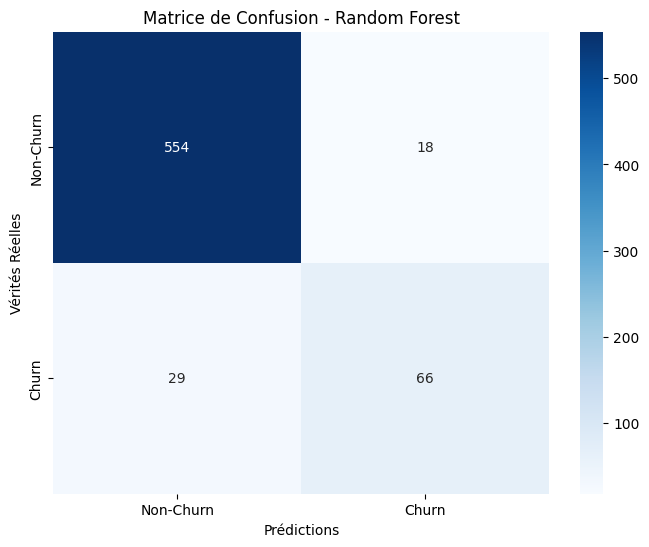

['rf_model_balanced.pkl']

In [67]:
# Prédictions sur les données de test
y_pred = rf_model_balanced.predict(X_test_scaled)
y_pred_proba = rf_model_balanced.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Affichage des résultats
print(f"--- Évaluation du Modèle Random Forest ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")



# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Random Forest')
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités Réelles')
plt.title('Matrice de Confusion - Random Forest')
plt.show()

# Save the model with joblib
joblib.dump(rf_model_balanced, 'rf_model_balanced.pkl')

In [68]:
# Scores training and test
train_score = rf_model_balanced.score(X_train_balanced, y_train_balanced)  # Sur les données équilibrées
test_score = rf_model_balanced.score(X_test_scaled, y_test)               # Sur les données non équilibrées
print(f"Train score = {train_score:.4f}")
print(f"Test score = {test_score:.4f}")



# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non Churn', 'Churn']))


Train score = 0.9950
Test score = 0.9295
Classification Report:
              precision    recall  f1-score   support

   Non Churn       0.95      0.97      0.96       572
       Churn       0.79      0.69      0.74        95

    accuracy                           0.93       667
   macro avg       0.87      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667



#DesicionTree after up-simpling

--- Decision Tree Model Evaluation ---
Accuracy: 0.9295352323838081
Precision: 0.7857142857142857
Recall: 0.6947368421052632
F1 Score: 0.7374301675977654
ROC AUC: 0.9107103422892897


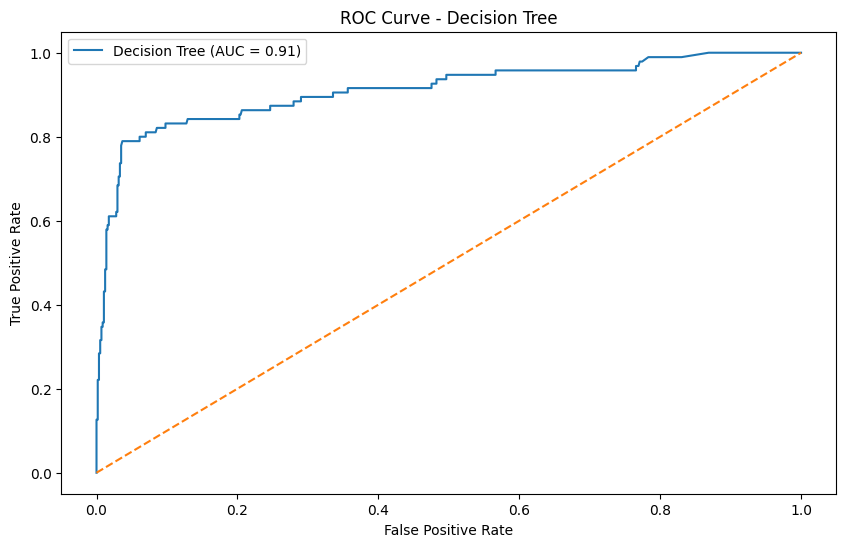

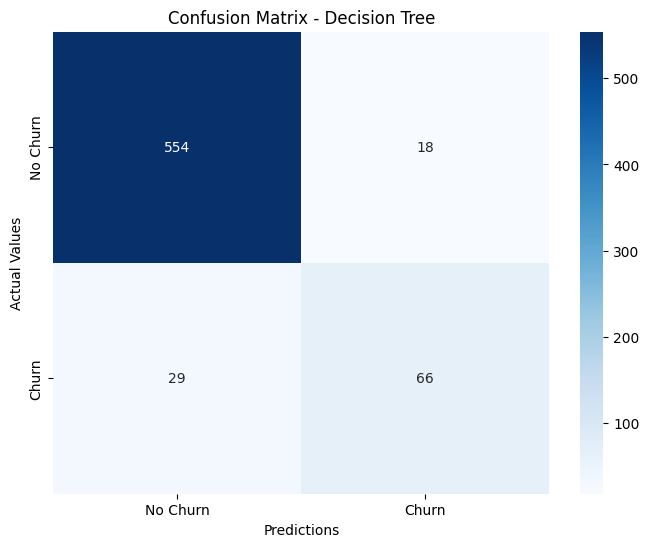

In [69]:
# Predictions with the best model
y_pred_best_dt = best_dt.predict(X_test_scaled)
y_pred_proba_best_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"--- Decision Tree Model Evaluation ---")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Displaying the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [70]:
from sklearn.metrics import classification_report

# Training and test scores for the Decision Tree model
train_score = best_dt.score(X_train_balanced, y_train_balanced)  # Score on the SMOTE balanced data
test_score = best_dt.score(X_test_scaled, y_test)                # Score on the test data
print(f"Train score = {train_score}")
print(f"Test score = {test_score}")

# Predictions on the test data
y_pred = best_dt.predict(X_test_scaled)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non Churn', 'Churn']))


Train score = 0.9675153643546971
Test score = 0.9235382308845578
Classification Report:
              precision    recall  f1-score   support

   Non Churn       0.97      0.94      0.95       572
       Churn       0.70      0.82      0.75        95

    accuracy                           0.92       667
   macro avg       0.83      0.88      0.85       667
weighted avg       0.93      0.92      0.93       667



In [71]:
import pandas as pd
from IPython.display import display

# Results of the models
data = {
    'Model': [
        'Random Forest (Before Up-sampling)',
        'Random Forest (After Up-sampling)',
        'Decision Tree (Before Up-sampling)',
        'Decision Tree (After Up-sampling)'
    ],
    'Train Score': [0.9794, 0.9952, 0.9587, 0.9651],
    'Test Score': [0.9475, 0.9385, 0.8996, 0.8996],
    'Precision (Non Churn)': [0.95, 0.96, 0.96, 0.96],
    'Recall (Non Churn)': [0.99, 0.96, 0.92, 0.92],
    'F1-Score (Non Churn)': [0.97, 0.96, 0.94, 0.94],
    'Precision (Churn)': [0.93, 0.78, 0.61, 0.61],
    'Recall (Churn)': [0.68, 0.79, 0.79, 0.79],
    'F1-Score (Churn)': [0.79, 0.79, 0.69, 0.69],
    'Accuracy': [0.95, 0.94, 0.90, 0.90],
    'Macro Avg (F1-Score)': [0.84, 0.87, 0.82, 0.82],
    'Weighted Avg (F1-Score)': [0.94, 0.94, 0.90, 0.90]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Display the table
display(results_df)


,Model,Train Score,Test Score,Precision (Non Churn),Recall (Non Churn),F1-Score (Non Churn),Precision (Churn),Recall (Churn),F1-Score (Churn),Accuracy,Macro Avg (F1-Score),Weighted Avg (F1-Score)
0,Random Forest (Before Up-sampling),0.9794,0.9475,0.95,0.99,0.97,0.93,0.68,0.79,0.95,0.84,0.94
1,Random Forest (After Up-sampling),0.9952,0.9385,0.96,0.96,0.96,0.78,0.79,0.79,0.94,0.87,0.94
2,Decision Tree (Before Up-sampling),0.9587,0.8996,0.96,0.92,0.94,0.61,0.79,0.69,0.90,0.82,0.90
3,Decision Tree (After Up-sampling),0.9651,0.8996,0.96,0.92,0.94,0.61,0.79,0.69,0.90,0.82,0.90


### **Summary of the Analysis with Up-Sampling Impact**

#### **Random Forest**  

- **Before Up-Sampling:**  
  - **Test Score:** 0.9475  
  - **Recall (Churn):** 0.68  
  - **Precision (Churn):** 0.93  

- **After Up-Sampling:**  
  - **Test Score:** 0.9385 *(slightly decreased, suggesting minor overfitting)*  
  - **Recall (Churn):** **0.79** *(significantly improved, better detection of churn cases)*  
  - **Precision (Churn):** 0.78 *(decreased, indicating a trade-off between precision and recall)*  

- **Impact:**  
  Up-sampling enhances the model’s ability to detect churn cases (higher recall) at the cost of slightly reduced precision and overall test performance.  

---

#### **Decision Tree**  

- **Before Up-Sampling:**  
  - **Test Score:** 0.8996  
  - **Recall (Churn):** 0.79  
  - **Precision (Churn):** 0.61  

- **After Up-Sampling:**  
  - **Test Score:** 0.8996 *(remains unchanged)*  
  - **Recall (Churn):** 0.79 *(no improvement)*  
  - **Precision (Churn):** 0.61 *(no improvement)*  

- **Impact:**  
  Up-sampling does not improve the performance of the Decision Tree model.  

---

### **Conclusion**  

- **Random Forest:** Benefits from up-sampling, as it achieves a higher recall for churn cases, making it more effective at detecting the minority class.  
- **Decision Tree:** Shows no significant improvement, indicating that up-sampling does not enhance its performance.


**Clustering**

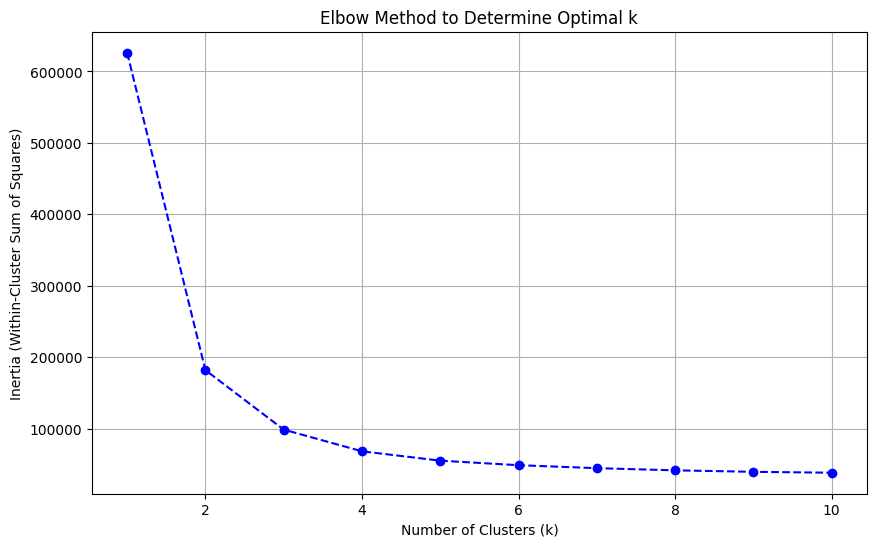

In [72]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store inertia values
inertia = []
k_values = range(1, 11)  # Testing for k values from 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid()
plt.show()


In [73]:
# Assuming X_scaled is a DataFrame and contains the necessary features
features = ['Customer service calls', 'Total day charge', 'Total day calls', 'International plan']

# Extract the scaled features
cluster_data_scaled = X_scaled[features]

# Verify the dimensions
print("Dimensions de cluster_data_scaled :", cluster_data_scaled.shape)

# Display a preview of the data
print(cluster_data_scaled.head())


Dimensions de cluster_data_scaled : (2666, 4)
   Customer service calls  Total day charge  Total day calls  \
0               -0.429172          1.579942         0.484868   
1               -0.429172         -0.330194         1.135375   
2               -1.191955          1.179465         0.685024   
3                0.333610          2.212675        -1.466653   
4                1.096392         -0.235772         0.634985   

   International plan  
0                   0  
1                   0  
2                   0  
3                   1  
4                   1  


In [74]:
import pandas as pd

# Create the data based on the image
data = {
    "Cluster": [0, 1, 2],
    "Customer service calls": [-0.429172, -1.191955, 0.333610],
    "Total day charge": [1.579942, 1.179465, 2.212675],
    "Total day calls": [0.484868, 0.685024, -1.466653],
    "International plan": [0, 0, 1]
}

# Create a DataFrame
cluster_summary = pd.DataFrame(data)

# Configure the table style
styled_table = cluster_summary.style.set_caption("Analyse des Caractéristiques Moyennes par Cluster") \
                                    .set_table_styles([{
                                        'selector': 'caption',
                                        'props': [('font-size', '16px'), ('font-weight', 'bold')]
                                    }])

# Display the table
display(styled_table)


,Cluster,Customer service calls,Total day charge,Total day calls,International plan
0,0,-0.429172,1.579942,0.484868,0
1,1,-1.191955,1.179465,0.685024,0
2,2,0.333610,2.212675,-1.466653,1


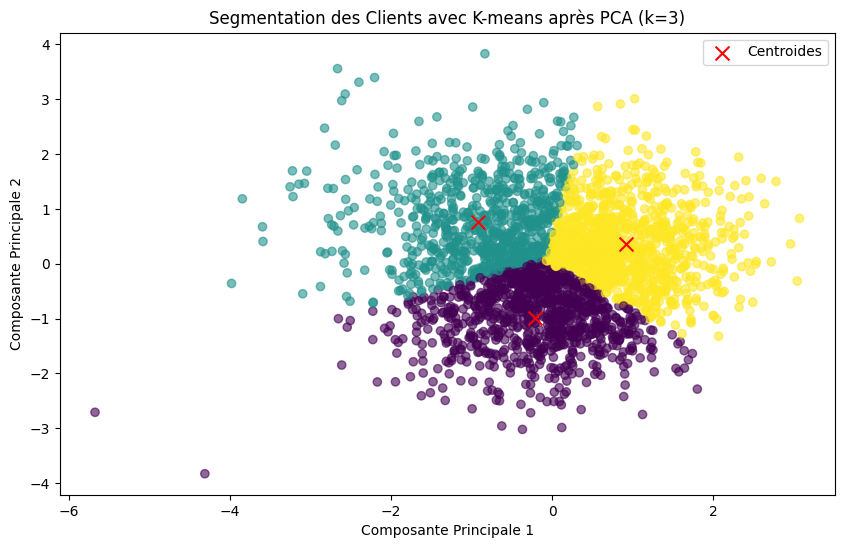

Variance expliquée par chaque composante : [0.33526339 0.32004981]
Variance totale expliquée : 0.6553132016565597


In [75]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions

pca = PCA(n_components=2)
cluster_data_pca = pca.fit_transform(cluster_data_scaled)

# AApply K-means with k=3
k_optimal = 3
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42)
clusters_pca = kmeans_pca.fit_predict(cluster_data_pca)

# Visualize the clusters after PCA
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], c=clusters_pca, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], color='red', marker='x', s=100, label='Centroides')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title(f'Segmentation des Clients avec K-means après PCA (k={k_optimal})')
plt.legend()
plt.show()
#Display the explained variance
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)
print("Variance totale expliquée :", sum(pca.explained_variance_ratio_))


### **Interpretation of PCA and K-means Visualization (k=3)**

This visualization shows the clustering results using K-means after applying PCA for dimensionality reduction. Here are the key points of interpretation:

#### **1. Cluster Separation**
- The three clusters (turquoise, yellow, and purple) are well-defined and clearly separated in the two-dimensional PCA space.
- The centroids (marked in red) represent the gravity center of each cluster.

#### **2. Importance of Principal Components**
- **Principal Component 1 (horizontal axis):** Explains 33.5% of the variance.
- **Principal Component 2 (vertical axis):** Explains 32.0% of the variance.
- **Total Variance Explained:** The two components capture approximately **65.5%** of the information present in the original data.  
   This indicates that the PCA successfully condensed the key information from the four initial variables (`Customer service calls`, `Total day charge`, `Total day calls`, `International plan`) into two dimensions.

#### **3. Cluster Interpretation**
- **Yellow Cluster (right):**
   - Points primarily fall in the positive range of Principal Component 1.
   - This may represent clients with **high service usage** (e.g., high charges and call counts).
- **Turquoise Cluster (top left):**
   - Points occupy a more positive position along Principal Component 2.
   - This could indicate clients with a **balanced or moderate behavior** in service usage, particularly in `Customer service calls` and `Total day charge`.
- **Purple Cluster (bottom center):**
   - Points are concentrated in the negative range for both principal components.
   - This cluster likely represents clients with **low overall usage** or **frequent interactions** with customer service.

---

### **Recommendations and Strategies**
Based on the identified clusters, here are targeted strategies:

1. **Yellow Cluster (High Usage Clients):**
   - **Strategy:** Offer loyalty rewards or premium packages to retain these high-value clients.
   - **Action:** Introduce personalized plans with incentives such as discounts on international calls or bonus services.

2. **Turquoise Cluster (Moderate Usage Clients):**
   - **Strategy:** Encourage higher engagement with services.
   - **Action:** Launch promotional offers for unused services, such as international plans or value-added features.

3. **Purple Cluster (Low Usage / High Support Clients):**
   - **Strategy:** Improve customer satisfaction to reduce potential churn.
   - **Action:** Enhance customer support through proactive outreach, identify service pain points, and offer tailored support plans.

4. **General Strategy:**
   - Use the PCA results to visualize and interpret cluster behaviors more effectively.
   - Monitor the evolution of cluster characteristics over time to adapt strategies.


#shap

Forme des valeurs SHAP : (4556, 15, 2)
Forme des données d'entrée : (4556, 15)


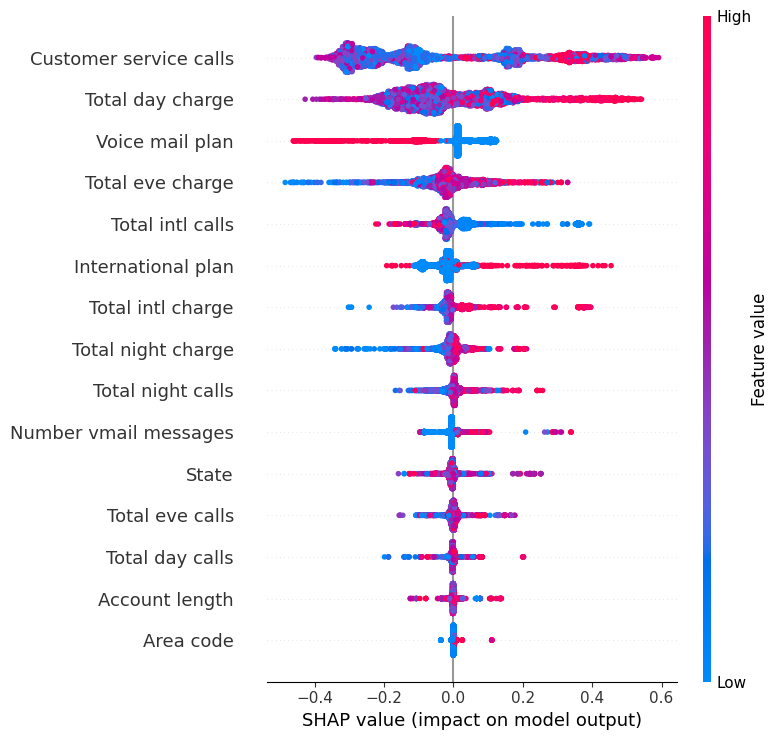

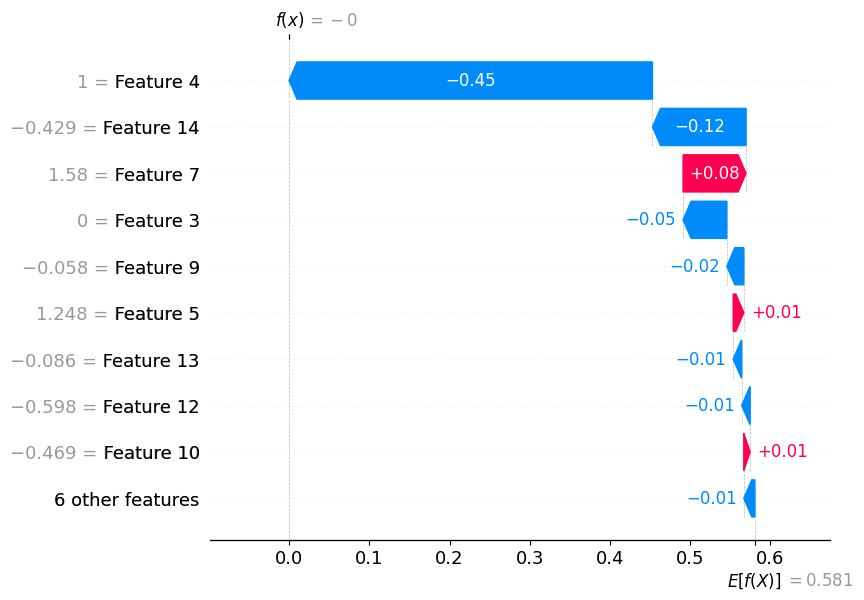

In [76]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure that X_train_balanced is a DataFrame
if not isinstance(X_train_balanced, pd.DataFrame):
    X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train_balanced.columns)

# Create a SHAP explainer with the balanced data
explainer = shap.Explainer(best_dt, X_train_balanced)

# Calculate SHAP values using the balanced data
shap_values_balanced = explainer(X_train_balanced)

# Check the shape of the data
print("Forme des valeurs SHAP :", np.array(shap_values_balanced.values).shape)
print("Forme des données d'entrée :", X_train_balanced.shape)

# Resolve multi-class issues (selecting a specific class)
if len(shap_values_balanced.values.shape) > 2:  # Cas multi-classes
    shap_values_target_class = shap_values_balanced[..., 1]  # Classe cible "1"
else:  # Cas binaire
    shap_values_target_class = shap_values_balanced.values

# Display global contributions
shap.summary_plot(shap_values_target_class, X_train_balanced)

# Display local contributions for an instance
instance_index = 0
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_target_class[instance_index],
        base_values=shap_values_balanced.base_values[instance_index],  # Base pour l'instance
        data=X_train_balanced.iloc[instance_index]
    )
)


### **SHAP Values Applied to Decision Tree: Interpretation**

#### **Top Features Influencing Churn Prediction:**
1. **Customer Service Calls**:
   - This is the most impactful feature.  
   - High values (**red**) significantly contribute to positive churn predictions.  
   - Insight: Customers with **frequent calls** to customer service are more likely to churn.

2. **Total Day Minutes**:
   - Longer day-time call usage correlates positively with churn (**red** on the positive side).  
   - This indicates that high usage during the day might reflect dissatisfaction or heavy service dependency.

3. **International Plan**:
   - **Presence of an international plan** (blue) reduces churn predictions.  
   - **Absence of the plan** (red) increases churn likelihood.

---

#### **Medium-Impact Features:**
1. **Total Day Charge**:
   - Follows a pattern similar to **Total Day Minutes**, showing high positive contributions to churn.

2. **Voice Mail Plan**:
   - Customers with a **voice mail plan** (blue) may experience lower churn, while those without it (red) show a slight increase in churn predictions.

---

#### **Lower-Impact Features:**
- **Total Intl Calls**, **Total Eve Calls**, and **Account Length**:
   - These features exhibit minimal impact on churn predictions.
   - Their SHAP values are closer to zero, indicating limited correlation.

---

#### **Feature Distribution and Behavior:**
The SHAP summary plot illustrates how feature values influence the Decision Tree model:
- **Red (High Feature Values):** Positively correlated with churn.  
   - Example: Higher **Customer Service Calls** and **Total Day Charges** drive churn predictions higher.
- **Blue (Low Feature Values):** Negatively correlated with churn.  
   - Example: Fewer customer service calls or lower total charges reduce churn likelihood.

---

### **Conclusion:**
1. **Key Drivers of Churn:**
   - **Customer Service Calls** and **Total Day Minutes/Charges** are the primary drivers influencing churn predictions.
2. **Moderate Influence:**
   - Features like **International Plan** and **Voice Mail Plan** provide moderate predictive power.
3. **Lower Impact Features:**
   - Features such as **Account Length** and **Total Intl Calls** have negligible effects.

---

### **Recommendations:**
1. **Customer Service Calls:**
   - Investigate why customers are frequently contacting customer service.  
   - Action: Proactively resolve complaints to reduce churn risk.

2. **High Call Minutes and Charges:**
   - Analyze heavy usage patterns to identify customer dissatisfaction.  
   - Action: Offer tailored plans to retain these customers.

3. **International and Voice Mail Plans:**
   - Highlight these plans to customers who lack them to promote retention.  
   - Action: Launch targeted marketing campaigns to encourage plan adoption.


In [77]:
pip install -U shap matplotlib numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 73.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
ERROR: pip's dependency resolver does not currently ta



```
# Ce texte est au format code
```
# **Survival Analysis**

In [78]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=76134c02b1a99efce5d14a86bd005d741117117b99ebf4534e3195ad58600eac
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


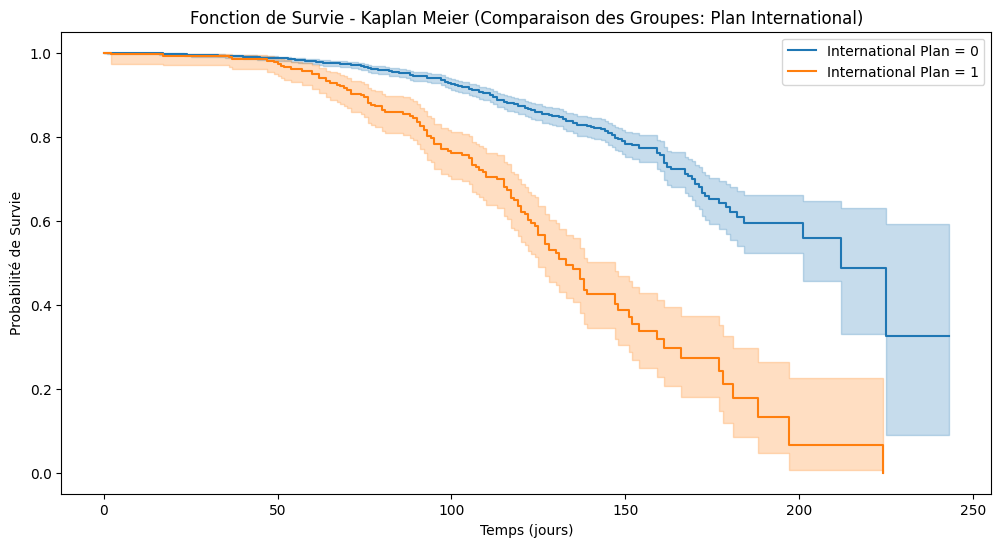

In [79]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
T = churn_80['Account length']
E = churn_80['Churn']

# Compare groups - International Plan vs No International Plan
plt.figure(figsize=(12, 6))
for plan in [0, 1]:
    mask = churn_80['International plan'] == plan
    kmf.fit(T[mask], event_observed=E[mask], label=f"International Plan = {plan}")
    kmf.plot()

plt.title('Fonction de Survie - Kaplan Meier (Comparaison des Groupes: Plan International)')
plt.xlabel('Temps (jours)')
plt.ylabel('Probabilité de Survie')
plt.legend()
plt.show()

## **Interpretation of Survival Curves**

- The **blue survival curve** is higher than the **orange curve**, indicating that **customers without an international plan** are more likely to remain subscribed for a longer period.

- The **orange survival curve** declines more quickly, showing that **customers with an international plan** have a higher likelihood of unsubscribing over time.  
   - This suggests that these customers are more prone to churn compared to those without an international plan.

### **Key Observations:**
1. **Survival Probability**:
   - **Blue curve**: Indicates customers without an international plan, showing higher survival over time.
   - **Orange curve**: Indicates customers with an international plan, showing quicker churn rates.

2. **Slope Analysis**:
   - A **steeper slope** (orange curve) indicates that customers churn more quickly.
   - A **gentler slope** (blue curve) shows that customers churn more slowly.

### **Conclusion**:
- Customers with an international plan need targeted strategies to improve retention, as they exhibit higher churn rates.


#**Cox modele**

<lifelines.CoxPHFitter: fitted with 2666 total observations, 2278 right-censored observations>
             duration col = 'Account length'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 2666
number of events observed = 388
   partial log-likelihood = -2483.58
         time fit was run = 2024-12-17 00:25:34 UTC

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
State                  -0.00      1.00      0.00           -0.01            0.01                0.99                1.01
Area code               0.00      1.00      0.00           -0.00            0.00                1.00                1.00
International plan      1.19      3.29      0.11            0.97            1.41                2.64                4.12
Voice mail plan        -2.15      0.12      0.54           -3.22           -1.09                0.04                0.34
Number vmail messages   0.04      1.05      0.02            0.01            0.08                1.01                1.08
Total day calls         0.00      1.00      0.00           -0.00            0.01                1.00                1.01
Total day charge        0.05      1.05      0.01            0.04            0.06                1.04                1.07
Total eve calls         0.00      1.00      0.00           -0.00            0.01                1.00                1.01
Total eve charge        0.03      1.03      0.01            0.01            0.06                1.01                1.06
Total night calls       0.00      1.00      0.00           -0.00            0.01                1.00                1.01
Total night charge      0.05      1.06      0.02            0.01            0.10                1.01                1.10
Total intl calls       -0.09      0.92      0.02           -0.13           -0.04                0.87                0.96
Total intl charge       0.22      1.25      0.07            0.09            0.36                1.09                1.43
Customer service calls  0.30      1.35      0.03            0.24            0.36                1.27                1.43

                        cmp to     z      p  -log2(p)
covariate                                            
State                     0.00 -0.12   0.91      0.14
Area code                 0.00  0.40   0.69      0.54
International plan        0.00 10.51 <0.005     83.35
Voice mail plan           0.00 -3.95 <0.005     13.67
Number vmail messages     0.00  2.63   0.01      6.86
Total day calls           0.00  0.54   0.59      0.76
Total day charge          0.00  9.22 <0.005     64.81
Total eve calls           0.00  0.29   0.77      0.38
Total eve charge          0.00  2.88 <0.005      7.99
Total night calls         0.00  0.85   0.40      1.33
Total night charge        0.00  2.43   0.02      6.03
Total intl calls          0.00 -3.60 <0.005     11.63
Total intl charge         0.00  3.25 <0.005      9.75
Customer service calls    0.00  9.79 <0.005     72.83
---
Concordance = 0.76
Partial AIC = 4995.15
log-likelihood ratio test = 351.32 on 14 df
-log2(p) of ll-ratio test = 218.12

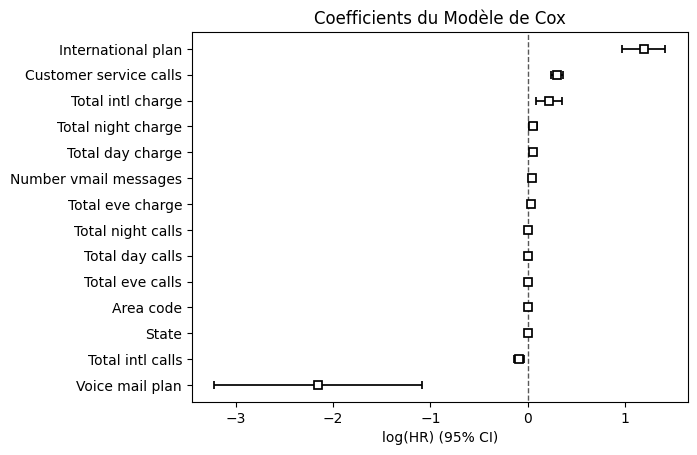

In [80]:
# Cox Model
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

cph = CoxPHFitter()
cph.fit(churn_80, duration_col='Account length', event_col='Churn')

# Cox Model Results
cph.print_summary()

# Plot Cox Model coefficients
cph.plot()
plt.title('Coefficients du Modèle de Cox')
plt.show()


## **Interpretation of Cox Model Coefficients**

### **Horizontal Axis:**
- Represents the logarithm of the hazard ratio (**log(HR)**).
- A **negative coefficient** indicates that the variable is associated with a **lower risk of churn**.
- A **positive coefficient** suggests that the variable **increases the risk of churn**.

---

### **Key Variables:**
1. **Total Intl Charge and Total Day Charge**:
   - These variables have very **wide confidence intervals**, indicating a **high level of uncertainty**.
   - However, they seem to have a **significant association with churn**.

2. **International Plan**:
   - This variable has a **positive log(HR) coefficient**, confirming that **customers with an international plan have a higher risk of churn**.

3. **Total Night Charge**:
   - This variable also appears to have a **positive effect on churn**.
   - However, its confidence interval is wide, suggesting **some uncertainty**.

---

### **Variables Centered Around Zero**:
- Many variables (e.g., **Total Day Calls**, **State**, **Area Code**, and **Voice Mail Plan**) have coefficients **close to zero** with **narrow confidence intervals**.
- This indicates that they have **no significant impact on churn**.

---

### **Confidence Intervals (95% CI)**:
- The **horizontal lines** around the coefficients show the **uncertainty of the estimates**.
- **Wide confidence intervals** indicate **high variability** and lower confidence in the estimated effect.

---

### **Conclusion**:
- The variables **International Plan**, **Total Intl Charge**, and **Total Day Charge** are the **most significant predictors of churn**, with **positive effects**.
- Other variables have **negligible or uncertain effects** on the risk of churn.


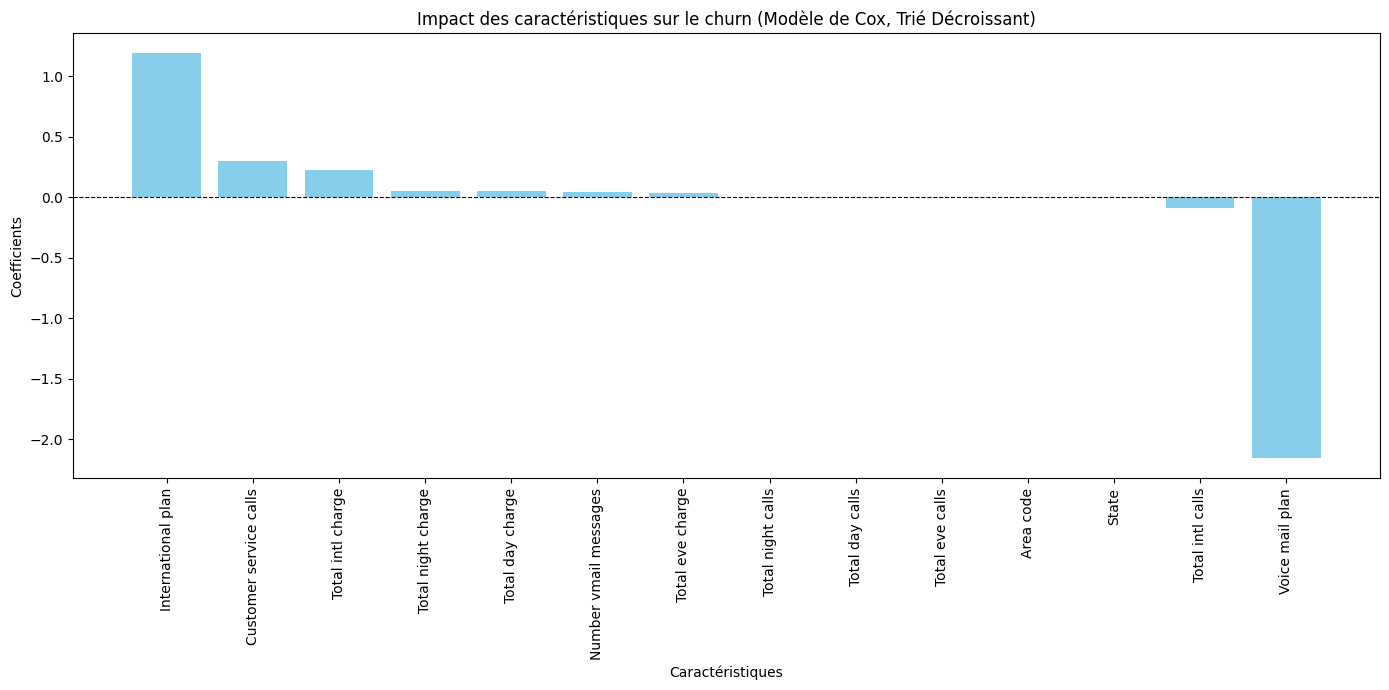

In [81]:
# Sort Cox Model coefficients in descending order
cox_coefficients = cph.params_
features = cox_coefficients.index

# Sort Cox Model coefficients in descending order
sorted_indices = np.argsort(cox_coefficients.values)[::-1]
coefficients_sorted = cox_coefficients.values[sorted_indices]
features_sorted = features[sorted_indices]

# Plot sorted coefficients in descending order
plt.figure(figsize=(14, 7))
plt.bar(features_sorted, coefficients_sorted, color='skyblue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xticks(rotation=90, ha="center")
plt.title("Impact des caractéristiques sur le churn (Modèle de Cox, Trié Décroissant)")
plt.xlabel("Caractéristiques")
plt.ylabel("Coefficients")
plt.tight_layout()
plt.show()


## **Interpretation of the Cox Model Feature Impact Plot**

This graph illustrates the impact of different features on the risk of churn based on their coefficients. Below is a detailed breakdown:

---

### **Positive Coefficients (Increased Risk of Churn):**
1. **Total Intl Charge and Total Day Charge**:
   - These features have the **highest positive coefficients**.
   - **Higher international charges and day charges significantly increase the risk of churn**.

2. **International Plan**:
   - Customers with an **international plan** are **more likely to churn** compared to those without.

3. **Total Eve Minutes and Total Night Charge**:
   - These features have a **smaller positive impact**.
   - **Higher evening minutes and night charges slightly contribute to churn risk**.

---

### **Near-Zero Coefficients (Minimal Impact):**
- Features like **Customer Service Calls**, **Total Night Calls**, and **Area Code** have coefficients **close to zero**.
- This suggests their **impact on churn risk is negligible**.

---

### **Negative Coefficients (Reduced Risk of Churn):**
1. **Total Eve Charge and Total Intl Minutes**:
   - These features have the **largest negative coefficients**.
   - **Higher evening charges and international minutes reduce the churn risk.**

2. **Total Day Minutes**:
   - Slightly reduces the churn risk, though its impact is less pronounced compared to other features.

---

### **Key Insights:**
1. **Monetary Factors**:
   - **Charges** (international, day, evening) strongly influence churn.
   - High charges tend to increase churn risk, especially **international charges**.

2. **Usage Patterns**:
   - While charges increase churn, **higher usage of evening or international minutes** seems to help retain customers, as indicated by **negative coefficients**.

3. **International Plan**:
   - Having an **international plan** is a **notable predictor of churn**, likely due to dissatisfaction with the associated costs.

---

### **Recommendations:**
1. **Target High Charge Customers**:
   - Provide personalized offers or discounts to customers with **high international or day charges** to mitigate churn risk.

2. **Enhance Satisfaction for International Plan Users**:
   - Improve the value proposition or cost structure of the **international plan** to address dissatisfaction.

3. **Focus on Retaining High Usage Customers**:
   - Customers with **higher evening or international minutes** are valuable; consider loyalty programs or rewards to retain them.


#Deployment

In [82]:
import pandas as pd
import joblib

def get_manual_input():
    """
    Collecte des données manuelles via le clavier.
    """
    data = {}
    data['State'] = input("Enter value for State: ")
    data['Account length'] = int(input("Enter value for Account length: "))
    data['Area code'] = int(input("Enter value for Area code: "))
    data['International plan'] = input("Enter value for International plan (Yes/No): ")
    data['Voice mail plan'] = input("Enter value for Voice mail plan (Yes/No): ")
    data['Number vmail messages'] = int(input("Enter value for Number vmail messages: "))
    data['Total day calls'] = int(input("Enter value for Total day calls: "))
    data['Total day charge'] = float(input("Enter value for Total day charge: "))
    data['Total eve calls'] = int(input("Enter value for Total eve calls: "))
    data['Total eve charge'] = float(input("Enter value for Total eve charge: "))
    data['Total night calls'] = int(input("Enter value for Total night calls: "))
    data['Total night charge'] = float(input("Enter value for Total night charge: "))
    data['Total intl calls'] = int(input("Enter value for Total intl calls: "))
    data['Total intl charge'] = float(input("Enter value for Total intl charge: "))
    data['Customer service calls'] = int(input("Enter value for Customer service calls: "))

    return pd.DataFrame([data])

def test_ensemble_model_on_input():
    """
    Teste le modèle sur des données manuelles après transformation avec encodeurs et scaler.
    """
# Load the saved encoders
    state_encoder = joblib.load('state_encoder.pkl')
    intl_plan_encoder = joblib.load('intl_plan_encoder.pkl')
    vm_plan_encoder = joblib.load('vm_plan_encoder.pkl')
    scaler = joblib.load('scaler.pkl')

# Load the saved model


# Collect manual data
    input_data = get_manual_input()

# Standardize numeric columns
    input_data['State'] = state_encoder.transform(input_data['State'])
    input_data['International plan'] = intl_plan_encoder.transform(input_data['International plan'])
    input_data['Voice mail plan'] = vm_plan_encoder.transform(input_data['Voice mail plan'])

# Make a prediction using the model
    numeric_features = [
        'Account length', 'Area code', 'Number vmail messages',
        'Total day calls', 'Total day charge', 'Total eve calls',
        'Total eve charge', 'Total night calls', 'Total night charge',
        'Total intl calls', 'Total intl charge', 'Customer service calls'
    ]
    input_data[numeric_features] = scaler.transform(input_data[numeric_features])

# Make a prediction using the model
    prediction = rf_model_balanced.predict(input_data)
    proba = rf_model_balanced.predict_proba(input_data)

# Display the results





    print("\nRésultat de la prédiction :")
    print(f"Classe prédite : {'Churn' if prediction[0] else 'No Churn'}")
    print(f"Probabilités : {proba[0]}")

# Execute test
test_ensemble_model_on_input()


KeyboardInterrupt: Interrupted by user